# Applied Data Analysis Project

## A. An overview of the dataset

**1. Import the data as pandas dataframe into the notebook.**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import missingno as msno
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the data as a pandas dataframe
df = pd.read_pickle('data_385k.pkl', compression='zip')

**2. Check the number of rows and columns.**

In [3]:
# number of rows and columns
df.shape

(385384, 99)

**3. Display few entries from the dataframe.**

In [4]:
# make sure all columns are visible
pd.set_option('display.max_columns', None)

In [5]:
# show first 5 entries
df.head()

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                0.0  8001772000030                  NaN          NaN   
1                0.0  7610809001066                  NaN          NaN   
2                0.0  8002530159021                  NaN          NaN   
3                0.0  3033715065788                  NaN          NaN   
4                0.0  7610848492740                  NaN          NaN   

   carbohydrates_per_hundred  carbohydrates_per_portion carbohydrates_unit  \
0                      75.00                      37.50                  g   
1                       1.50                       1.13                  g   
2                      52.68                        NaN                  g   
3                      70.40                      11.97                  g   
4                      37.00                       7.40                  g   

   cholesterol_per_hundred cholesterol_unit  copper_cu_per_hundred  \
0                      NaN              NaN                    NaN   
1                      NaN              NaN                    NaN   
2                      NaN              NaN                    NaN   
3                      NaN              NaN                    NaN   
4                      NaN              NaN                    NaN   

  copper_cu_unit country                created_at  energy_kcal_per_hundred  \
0            NaN      CH  2016-06-01T11:42:22.908Z                    359.0   
1            NaN      CH  2016-06-01T11:42:25.111Z                    242.0   
2            NaN      CH  2016-06-01T11:42:25.900Z                    325.0   
3            NaN      CH  2016-06-01T11:42:26.184Z                    402.0   
4            NaN      CH  2016-06-01T11:42:26.350Z                    591.0   

   energy_kcal_per_portion energy_kcal_unit  energy_per_hundred  \
0                    179.0             kCal              1500.0   
1                    181.0             kCal              1010.0   
2                      NaN             kCal              1358.3   
3                     68.0             kCal              1679.0   
4                    118.0             kCal              2470.0   

   energy_per_portion energy_unit  fat_per_hundred  fat_per_portion fat_unit  \
0               150.0          kJ             0.42             0.21        g   
1               758.0          kJ            18.00            13.50        g   
2                 NaN          kJ            12.08              NaN        g   
3               285.0          kJ             7.90             1.34        g   
4               494.0          kJ            44.00             8.80        g   

   fatty_acids_total_saturated_per_hundred fatty_acids_total_saturated_unit  \
0                                      NaN                              NaN   
1                                      NaN                              NaN   
2                                      NaN                              NaN   
3                                      NaN                              NaN   
4                                      NaN                              NaN   

   fatty_acids_total_trans_per_hundred fatty_acids_total_trans_unit  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   

   fiber_insoluble_per_hundred fiber_insoluble_unit  fiber_per_hundred  \
0                          NaN                  NaN                NaN   
1                          NaN                  NaN                0.0   
2                          NaN                  NaN                NaN   
3                          NaN                  NaN                9.1   
4                          NaN             

**4. Check the data type for each column. Create separate lists to hold the names of columns of the same data type.**

In [6]:
# check the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

In [7]:
# see how many different data types dataframe contains
pd.value_counts(df.dtypes)

float64    50
object     48
int64       1
dtype: int64

There are 50 columns with float64, 48 columns with object and 1 column with int64 data type.

In [8]:
# create a list with float64 columns
list_float = df.dtypes[df.dtypes == 'float64'].index.tolist()

# show the list
list_float

['alcohol_by_volume',
 'calcium_per_hundred',
 'carbohydrates_per_hundred',
 'carbohydrates_per_portion',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_kcal_per_portion',
 'energy_per_hundred',
 'energy_per_portion',
 'fat_per_hundred',
 'fat_per_portion',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_per_portion',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'portion_quantity',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'protein_per_portion',
 'quantity',
 'salt_per_hundred',
 'salt_per_portion',
 'saturated_fat_per_hundred',
 'saturated_fat_per_portion',
 'sodium_per_hundred',
 'sodium_per_portion',
 's

In [9]:
# create a list with int64 columns
list_int = df.dtypes[df.dtypes == 'int64'].index.tolist()

# show the list
list_int

['id']

In [10]:
# create a list with object columns
list_object = df.dtypes[df.dtypes == 'object'].index.tolist()

# show the list
list_object

['barcode',
 'calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'country',
 'created_at',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_unit',
 'folic_acid_unit',
 'hundred_unit',
 'ingredients_en',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'monounsaturated_fatty_acids_unit',
 'phosphorus_unit',
 'polyunsaturated_fatty_acids_unit',
 'portion_unit',
 'potassium_k_unit',
 'product_name_de',
 'product_name_en',
 'product_name_fr',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'unit',
 'updated_at',
 'vitamin_a_iu_unit',
 'vitamin_b12_cobalamin_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 

**5. Check the data by the type of information they hold. Create 3 lists that hold _per_hundred, _per_portion and _unit columns. Put the remaining column names in a 4th list named other_cols.**

In [11]:
# check the data with float64 date type
df[list_float].head()

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
0                0.0                  NaN                      75.00   
1                0.0                  NaN                       1.50   
2                0.0                  NaN                      52.68   
3                0.0                  NaN                      70.40   
4                0.0                  NaN                      37.00   

   carbohydrates_per_portion  cholesterol_per_hundred  copper_cu_per_hundred  \
0                      37.50                      NaN                    NaN   
1                       1.13                      NaN                    NaN   
2                        NaN                      NaN                    NaN   
3                      11.97                      NaN                    NaN   
4                       7.40                      NaN                    NaN   

   energy_kcal_per_hundred  energy_kcal_per_portion  energy_per_hundred  \
0                    359.0                    179.0              1500.0   
1                    242.0                    181.0              1010.0   
2                    325.0                      NaN              1358.3   
3                    402.0                     68.0              1679.0   
4                    591.0                    118.0              2470.0   

   energy_per_portion  fat_per_hundred  fat_per_portion  \
0               150.0             0.42             0.21   
1               758.0            18.00            13.50   
2                 NaN            12.08              NaN   
3               285.0             7.90             1.34   
4               494.0            44.00             8.80   

   fatty_acids_total_saturated_per_hundred  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   fatty_acids_total_trans_per_hundred  fiber_insoluble_per_hundred  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   

   fiber_per_hundred  fiber_per_portion  fiber_soluble_per_hundred  \
0                NaN                NaN                        NaN   
1                0.0               0.00                        NaN   
2                NaN                NaN                        NaN   
3                9.1               1.55                        NaN   
4                9.0               1.80                        NaN   

   folate_total_per_hundred  folic_acid_per_hundred  iron_per_hundred  \
0                       NaN                     NaN               NaN   
1                       NaN                     NaN               NaN   
2                       NaN                     NaN               NaN   
3                       NaN                     NaN               NaN   
4                       NaN                     NaN               NaN   

   magnesium_per_hundred  manganese_mn_per_hundred  \
0                    NaN                       NaN   
1                    NaN                       NaN   
2                    NaN                       NaN   
3                    NaN                       NaN   
4                    NaN                       NaN   

   monounsaturated_fatty_acids_per_hundred  phosphorus_per_hundred  \
0                                      NaN                     NaN   
1                                      NaN                     NaN   
2                                      NaN                     NaN   
3                                      NaN                     NaN   
4                                      NaN  

In [12]:
# check the data with object date type
df[list_object].head()

barcode calcium_unit carbohydrates_unit cholesterol_unit  \
0  8001772000030          NaN                  g              NaN   
1  7610809001066          NaN                  g              NaN   
2  8002530159021          NaN                  g              NaN   
3  3033715065788          NaN                  g              NaN   
4  7610848492740          NaN                  g              NaN   

  copper_cu_unit country                created_at energy_kcal_unit  \
0            NaN      CH  2016-06-01T11:42:22.908Z             kCal   
1            NaN      CH  2016-06-01T11:42:25.111Z             kCal   
2            NaN      CH  2016-06-01T11:42:25.900Z             kCal   
3            NaN      CH  2016-06-01T11:42:26.184Z             kCal   
4            NaN      CH  2016-06-01T11:42:26.350Z             kCal   

  energy_unit fat_unit fatty_acids_total_saturated_unit  \
0          kJ        g                              NaN   
1          kJ        g                              NaN   
2          kJ        g                              NaN   
3          kJ        g                              NaN   
4          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                          NaN                  NaN                NaN   
1                          NaN                  NaN                NaN   
2                          NaN                  NaN                NaN   
3                          NaN                  NaN                NaN   
4                          NaN                  NaN                NaN   

  fiber_unit folate_total_unit folic_acid_unit hundred_unit  \
0        NaN               NaN             NaN            g   
1          g               NaN             NaN            g   
2        NaN               NaN             NaN            g   
3          g               NaN             NaN            g   
4          g               NaN             NaN            g   

                                      ingredients_en iron_unit magnesium_unit  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...       NaN            NaN   
1               Bio Milk (Switzerland), kitchen salt       NaN            NaN   
2                               100%  coffee Arabica       NaN            NaN   
3  Powdered chocolate 99% (sugar, cocoa), emulsif...       NaN            NaN   
4  cocoa paste * (Honduras), raw cane sugar * (Pa...       NaN            NaN   

  manganese_mn_unit monounsaturated_fatty_acids_unit phosphorus_unit  \
0               NaN                              NaN             NaN   
1               NaN                              NaN             NaN   
2               NaN                              NaN             NaN   
3               NaN                              NaN             NaN   
4               NaN                              NaN             NaN   

  polyunsaturated_fatty_acids_unit portion_unit potassium_k_unit  \
0                              NaN            g              NaN   
1                              NaN            g              NaN   
2                              NaN            g              NaN   
3                              NaN            g              NaN   
4                              NaN            g              NaN   

                            product_name_de  \
0                           Bio Spaghetti     
1                     Naturaplan Mozzarella   
2                  Caffè Mauro - Bio Kaffe    
3  Le chocolat Cailler -  schokoladenpulver   
4     Naturaplan ExtraDunkle Schokolade 70%   

                              product_name_en  \
0                              Bio Spaghetti    
1                       Naturaplan Mozzarella   
2  Caffè Mauro - Roasted organic coffee blend   
3     Le chocolat Cailler -  chocolate powder   
4         Naturaplan Extra Dark Chocolate 70%   

                             product_name_fr protein_unit salt_unit  \
0         

In [13]:
# check the data with int64 date type
df[list_int].head()

id
0  1000
1  1001
2  1002
3  1003
4  1004

In [14]:
# create a list that holds _per_hundred columns
_per_hundred = [col for col in df.columns if col.endswith('_per_hundred')]

# show the list
_per_hundred

# note: endswith() method is used, because column name 'vitamin_d_d2_d3_international_units_per_hundred' 
# contains both '_unit' and '_per_hundred'.

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_added_per_hundred',
 'sugars_per_hundred',
 'vitamin_a_iu_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin

In [15]:
# create a list that holds _per_portion columns
_per_portion = [col for col in df.columns if col.endswith('_per_portion')]

# show the list
_per_portion

['carbohydrates_per_portion',
 'energy_kcal_per_portion',
 'energy_per_portion',
 'fat_per_portion',
 'fiber_per_portion',
 'protein_per_portion',
 'salt_per_portion',
 'saturated_fat_per_portion',
 'sodium_per_portion',
 'sugars_per_portion']

In [16]:
# create a list that holds _unit columns
_unit = [col for col in df.columns if col.endswith('_unit')]

# show the list
_unit

['calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_unit',
 'folic_acid_unit',
 'hundred_unit',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'monounsaturated_fatty_acids_unit',
 'phosphorus_unit',
 'polyunsaturated_fatty_acids_unit',
 'portion_unit',
 'potassium_k_unit',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'vitamin_a_iu_unit',
 'vitamin_b12_cobalamin_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 'vitamin_d_d2_d3_international_units_unit',
 'zinc_unit']

In [17]:
# create a list of remaining column names (not holding _per_hundred, _per_portion and _unit)
other_cols = [col for col in df.columns if not
          (col.endswith('_per_hundred') or col.endswith('_per_portion') or col.endswith('_unit'))]

# show the list
other_cols

['alcohol_by_volume',
 'barcode',
 'country',
 'created_at',
 'id',
 'ingredients_en',
 'portion_quantity',
 'product_name_de',
 'product_name_en',
 'product_name_fr',
 'quantity',
 'unit',
 'updated_at']

## B. Data Cleaning

**1. Are there any duplicated products in the data? Can they be removed? What is the shape of the remaining data?**

In [18]:
# sum of duplicated rows (products)
df.duplicated().sum()

10500

There are 10'500 duplicated products.

In [19]:
# remove duplicated products
df.drop_duplicates(inplace=True)

In [20]:
# dataframe shape
df.shape

(374884, 99)

Remaining data has 374'884 rows and 99 columns.

**2a) Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest.**

In [21]:
# dataframe with the number of missing values in each column
df_x = df.isnull().sum().to_frame()
df_x.columns = ['number of missing values']

# new column with the percentage of missing values 
df_x['percentage of missing values'] = df_x['number of missing values'] * 100 / len(df)

# make sure all rows are visible
pd.set_option('display.max_rows', None)

# sort from largest to smallest
df_x.sort_values('percentage of missing values', ascending=False)

number of missing values  \
sodium_per_portion                                                 374131   
fiber_insoluble_per_hundred                                        371375   
fiber_insoluble_unit                                               371374   
manganese_mn_per_hundred                                           371350   
manganese_mn_unit                                                  371347   
copper_cu_per_hundred                                              371273   
copper_cu_unit                                                     371273   
fiber_soluble_per_hundred                                          371057   
fiber_soluble_unit                                                 371055   
folic_acid_per_hundred                                             370428   
folic_acid_unit                                                    370409   
vitamin_b5_panthothenic_acid_per_hundred                           370343   
vitamin_b5_panthothenic_acid_unit                                  370325   
folate_total_per_hundred                                           367188   
folate_total_unit                                                  367188   
fiber_per_portion                                                  366707   
zinc_per_hundred                                                   366369   
zinc_unit                                                          366351   
salt_per_portion                                                   365170   
saturated_fat_per_portion                                          365155   
vitamin_b12_cobalamin_per_hundred                                  365135   
vitamin_b12_cobalamin_unit                                         365107   
energy_per_portion                                                 365089   
energy_kcal_per_portion                                            364917   
sugars_per_portion                                                 364764   
protein_per_portion                                                364608   
carbohydrates_per_portion                                          364529   
fat_per_portion                                                    364478   
magnesium_per_hundred                                              363879   
magnesium_unit                                                     363827   
phosphorus_per_hundred                                             363537   
phosphorus_unit                                                    363532   
vitamin_b6_pyridoxin_per_hundred                                   361645   
vitamin_b6_pyridoxin_unit                                          361619   
product_name_de                                                    355736   
vitamin_b2_riboflavin_per_hundred                                  355201   
vitamin_b2_riboflavin_unit                                         355177   
vitamin_b1_thiamin_per_hundred                                     354482   
vitamin_b1_thiamin_unit                                            354458   
saturated_fat_per_hundred                                          353974   
vitamin_b3_niacin_per_hundred                                      353767   
vitamin_b3_niacin_unit                                             353748   
saturated_fat_unit                                                 353709   
salt_per_hundred                                                   353399   
salt_unit                                                          353226   
product_name_fr                                                    353199   
sugars_added_per_hundred                                           332406   
sugars_added_unit                                                  332402   
polyunsaturated_fatty_acids_per_hundred                            330164   
polyunsaturated_fatty_acids_unit                                   330146   
monounsaturated_fatty_acids_per_hundred                            329810   
monounsaturated_fatty_acids_unit             

**2b) Use missingno to visualize where the missing values are and whether they overlap between columns or not.**

<AxesSubplot:>

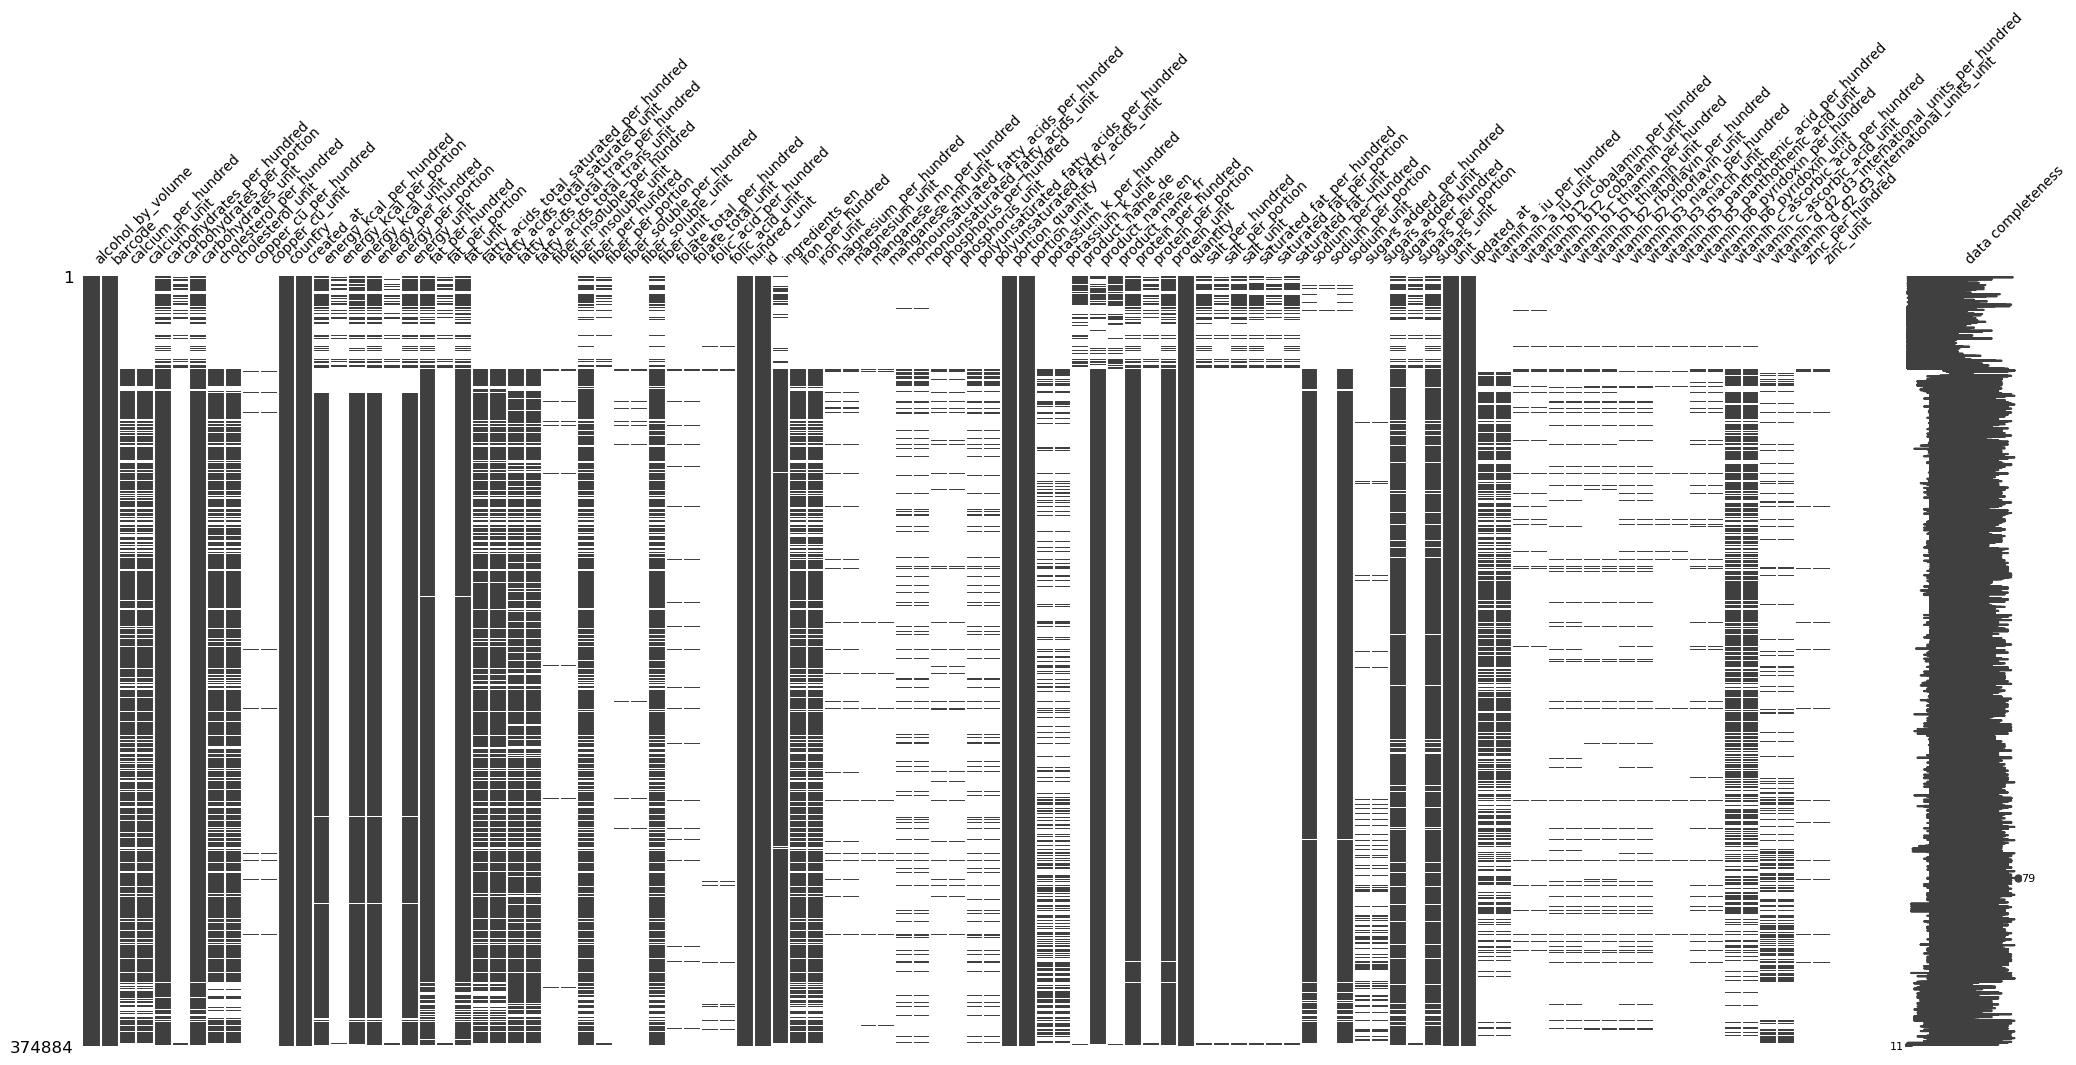

In [22]:
# visualize the missing values with missingo (msno)
msno.matrix(df, fontsize=10, labels=True)

On x-axis are 99 features, and on y-axis 374'884 products.

There is a hole in the shape of vertical rectangle between features 63 and 68. These are missing values that overlap between 6 columns: salt_per_hundred, salt_per_portion, salt_unit, saturated_fat_per_hundred, saturated_fat_per_portion and saturated_fat_unit.

Otherwise, there are single columns where missing values do not overlap with other columns, such as carbohydrates_per_portion or sodium_per_portion.

**2c) Use 4 lists (from task A5) to create 4 bar charts that show the percentages of missing values in each list. Use missingo on these 4 reduced dataframes.**

<AxesSubplot:title={'center':'Percentage of missing values in _per_hundred columns'}>

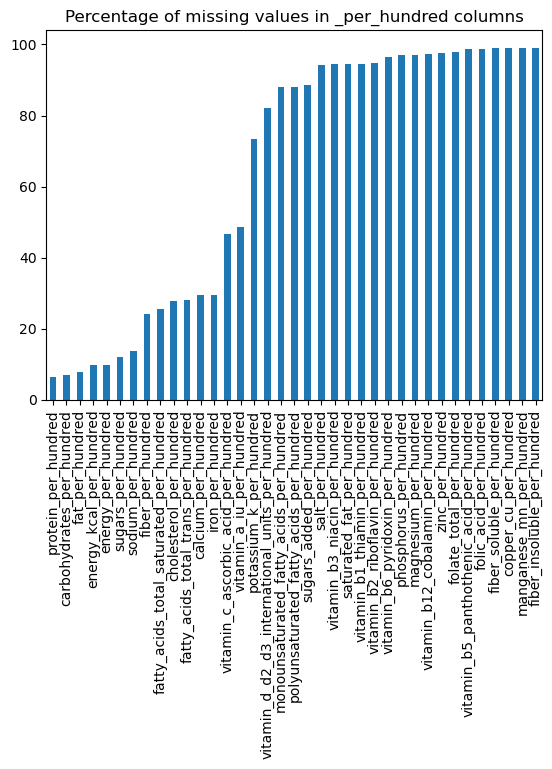

In [23]:
# dataframe with percentage of missing values in _per_hundred columns
df_a = df_x[df_x.index.isin(_per_hundred)]

# plot bar chart with percentage of missing values in _per_hundred columns
df_a['percentage of missing values'].sort_values().plot(
    kind = 'bar', 
    title = 'Percentage of missing values in _per_hundred columns'
)

<AxesSubplot:>

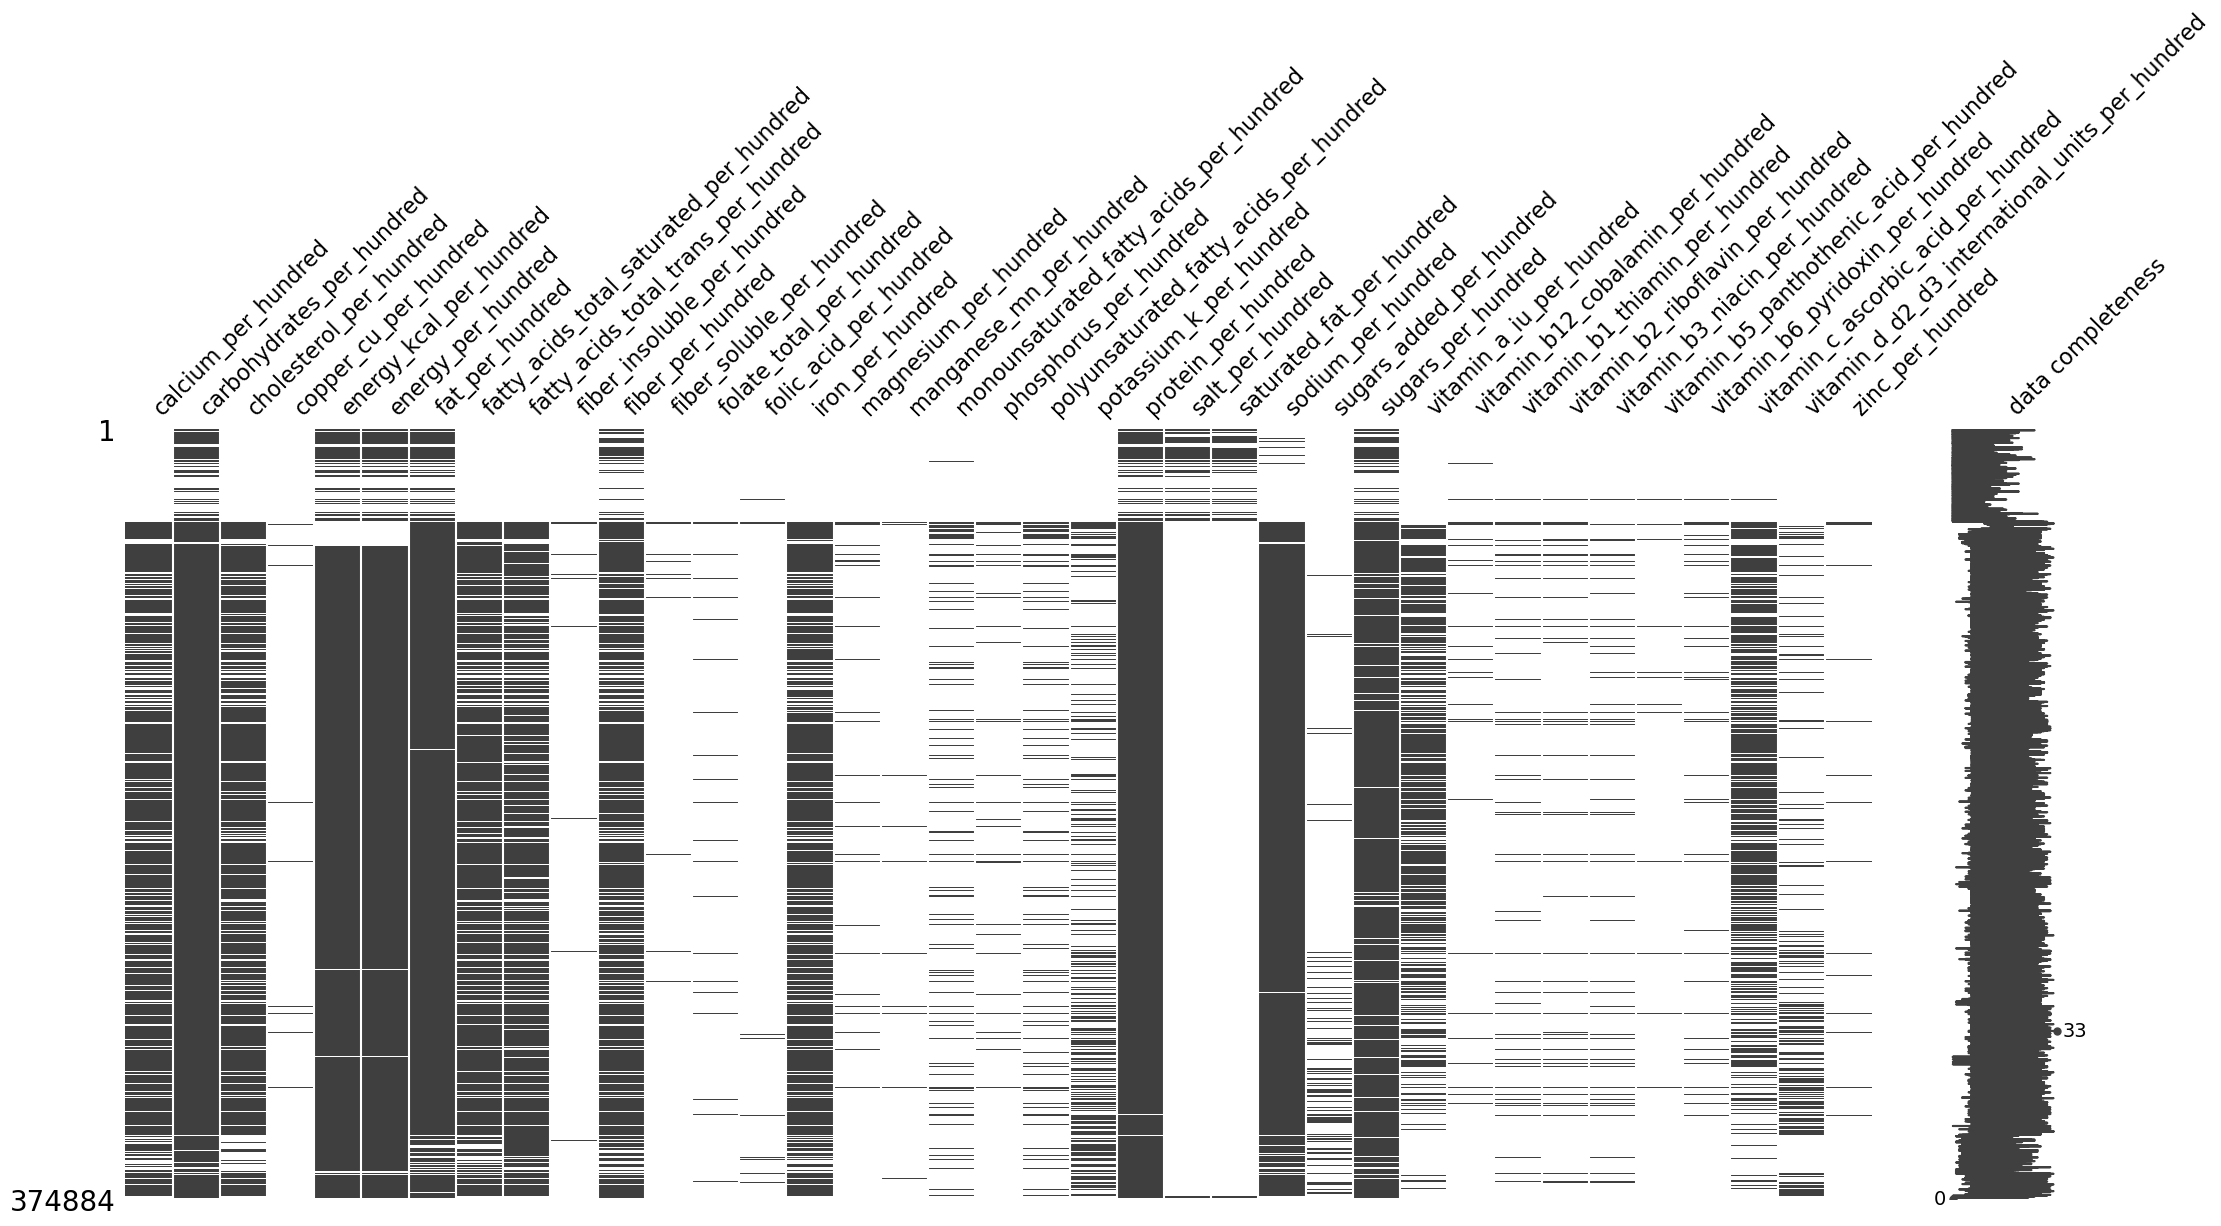

In [24]:
# use missingno on dataframe with _per_hundred columns
msno.matrix(df.loc[:, _per_hundred], labels=True)

<AxesSubplot:title={'center':'Percentage of missing values in _per_portion columns'}>

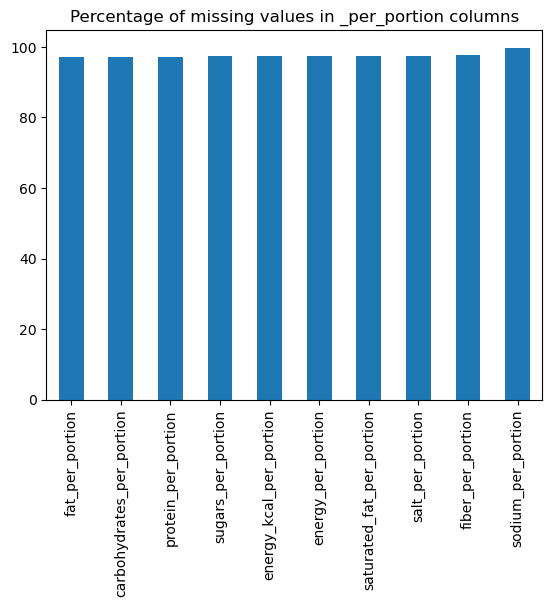

In [25]:
# dataframe with percentage of missing values in _per_portion columns
df_b = df_x[df_x.index.isin(_per_portion)]

# plot bar chart with percentage of missing values in _per_portion columns
df_b['percentage of missing values'].sort_values().plot(
    kind = 'bar', 
    title = 'Percentage of missing values in _per_portion columns'
)

<AxesSubplot:>

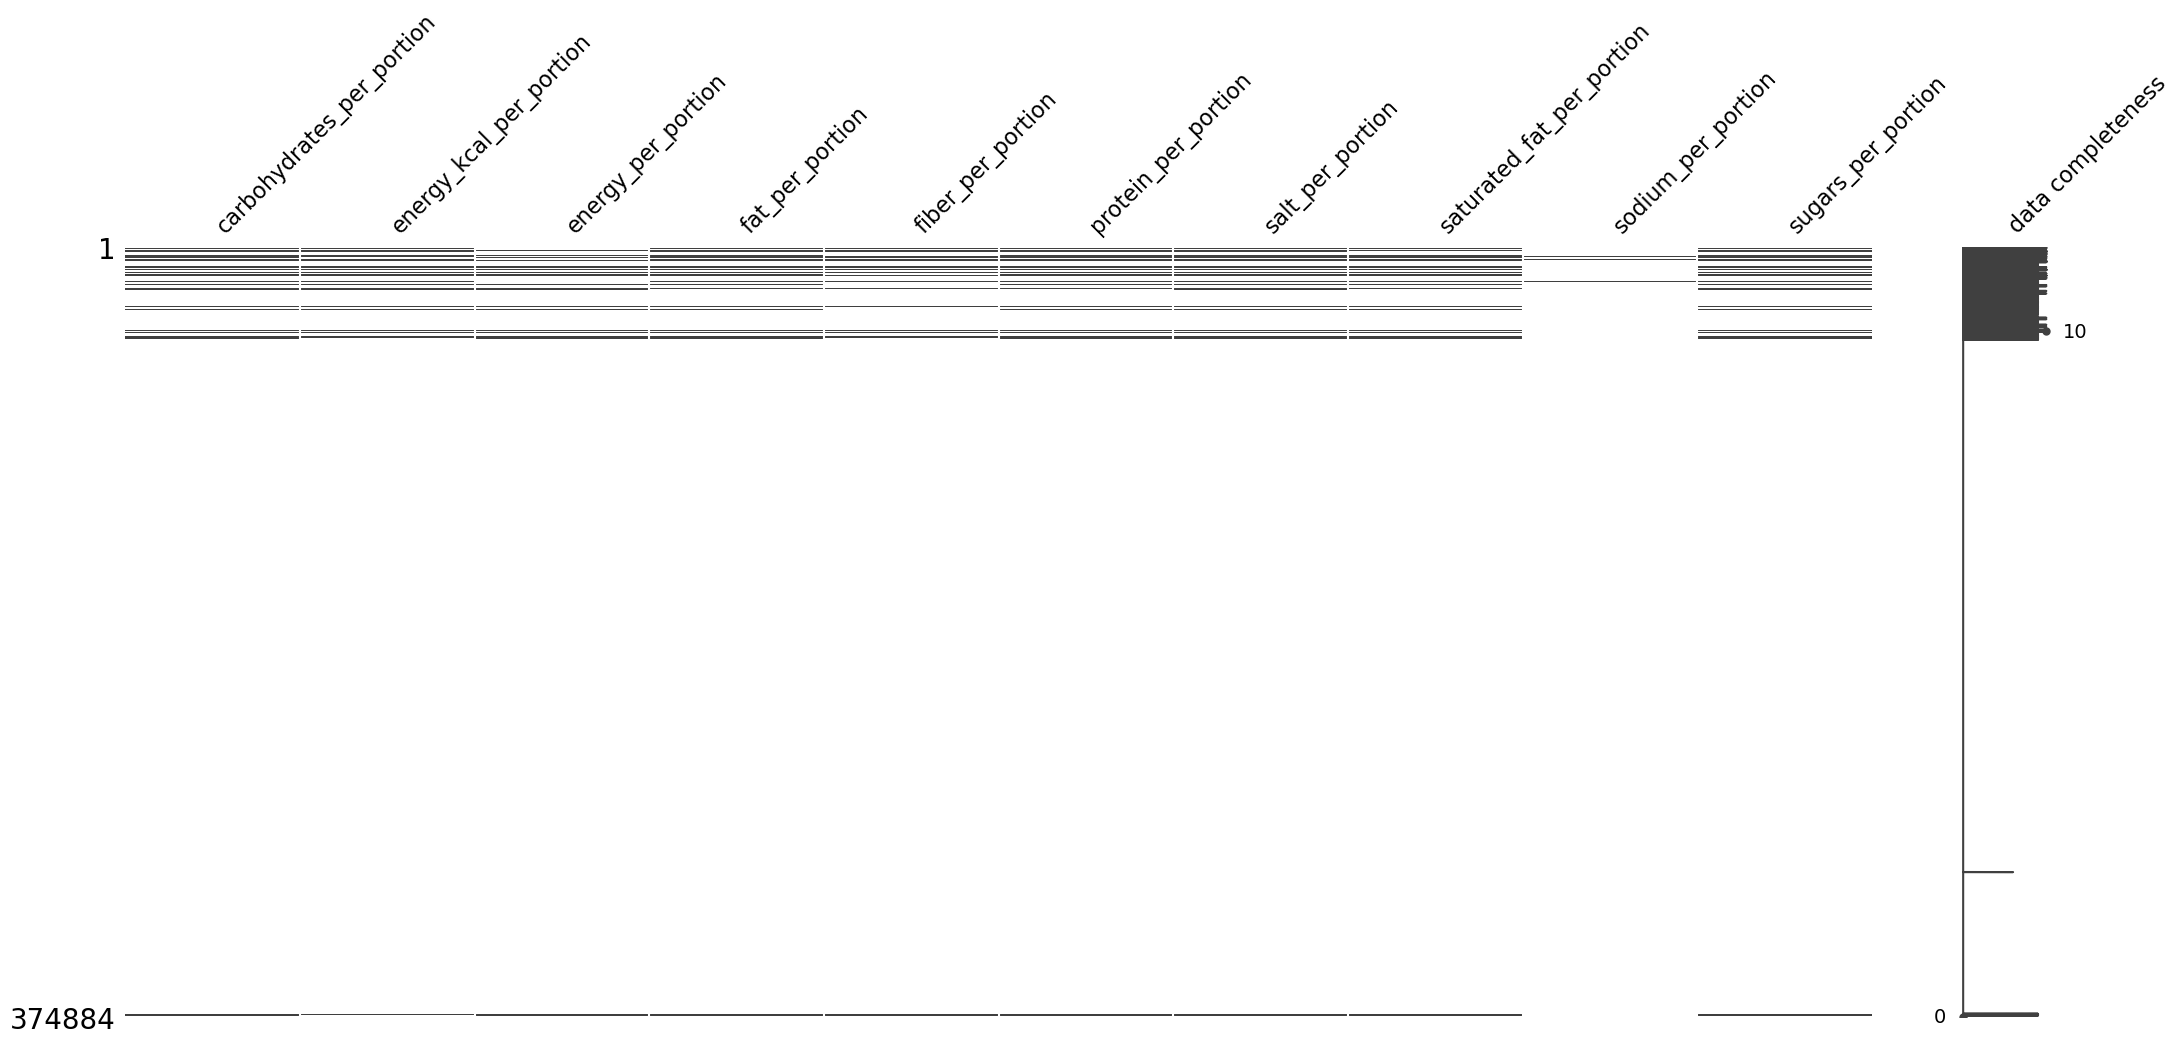

In [26]:
# use missingno on dataframe with _per_portion columns
msno.matrix(df.loc[:, _per_portion], labels=True)

<AxesSubplot:title={'center':'Percentage of missing values in _unit columns'}>

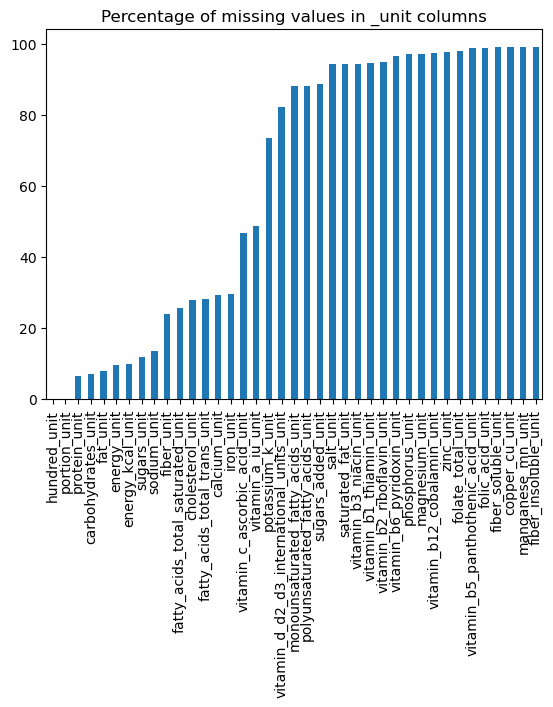

In [27]:
# dataframe with percentage of missing values in _unit columns
df_c = df_x[df_x.index.isin(_unit)]

# plot bar chart with percentage of missing values in _unit columns
df_c['percentage of missing values'].sort_values().plot(
    kind = 'bar',
    title = 'Percentage of missing values in _unit columns'
)

<AxesSubplot:>

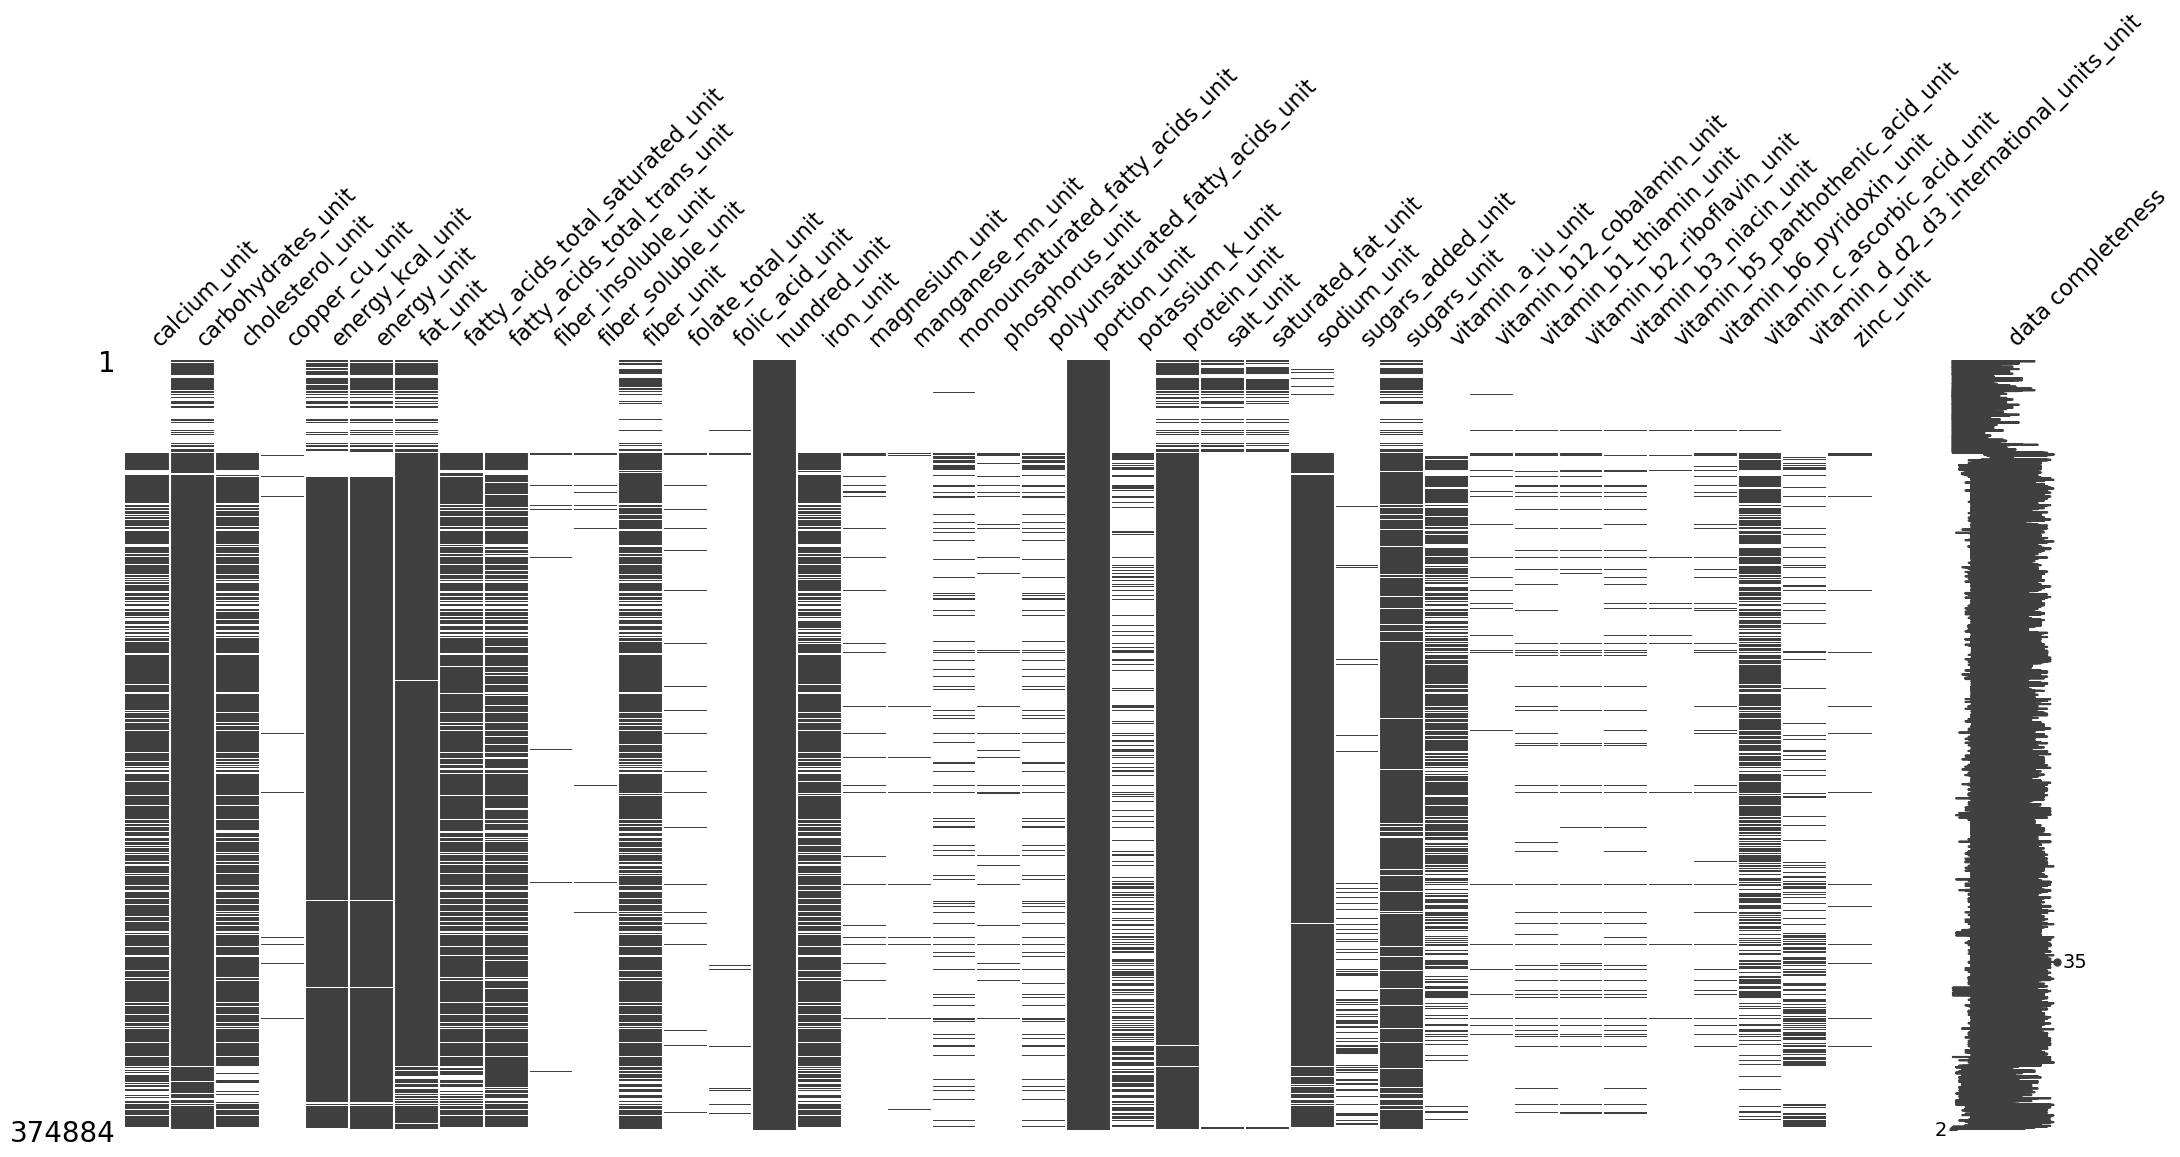

In [28]:
# use missingno on dataframe with _unit columns
msno.matrix(df.loc[:, _unit], labels=True)

<AxesSubplot:title={'center':'Percentage of missing values in other_cols list'}>

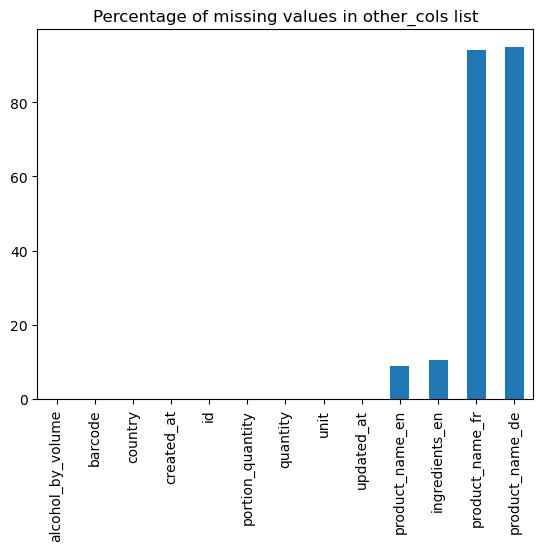

In [29]:
# dataframe with percentage of missing values in other_cols columns
df_d = df_x[df_x.index.isin(other_cols)]

# plot bar chart with percentage of missing values in other_cols columns
df_d['percentage of missing values'].sort_values().plot(
    kind = 'bar',
    title = 'Percentage of missing values in other_cols list'
)

<AxesSubplot:>

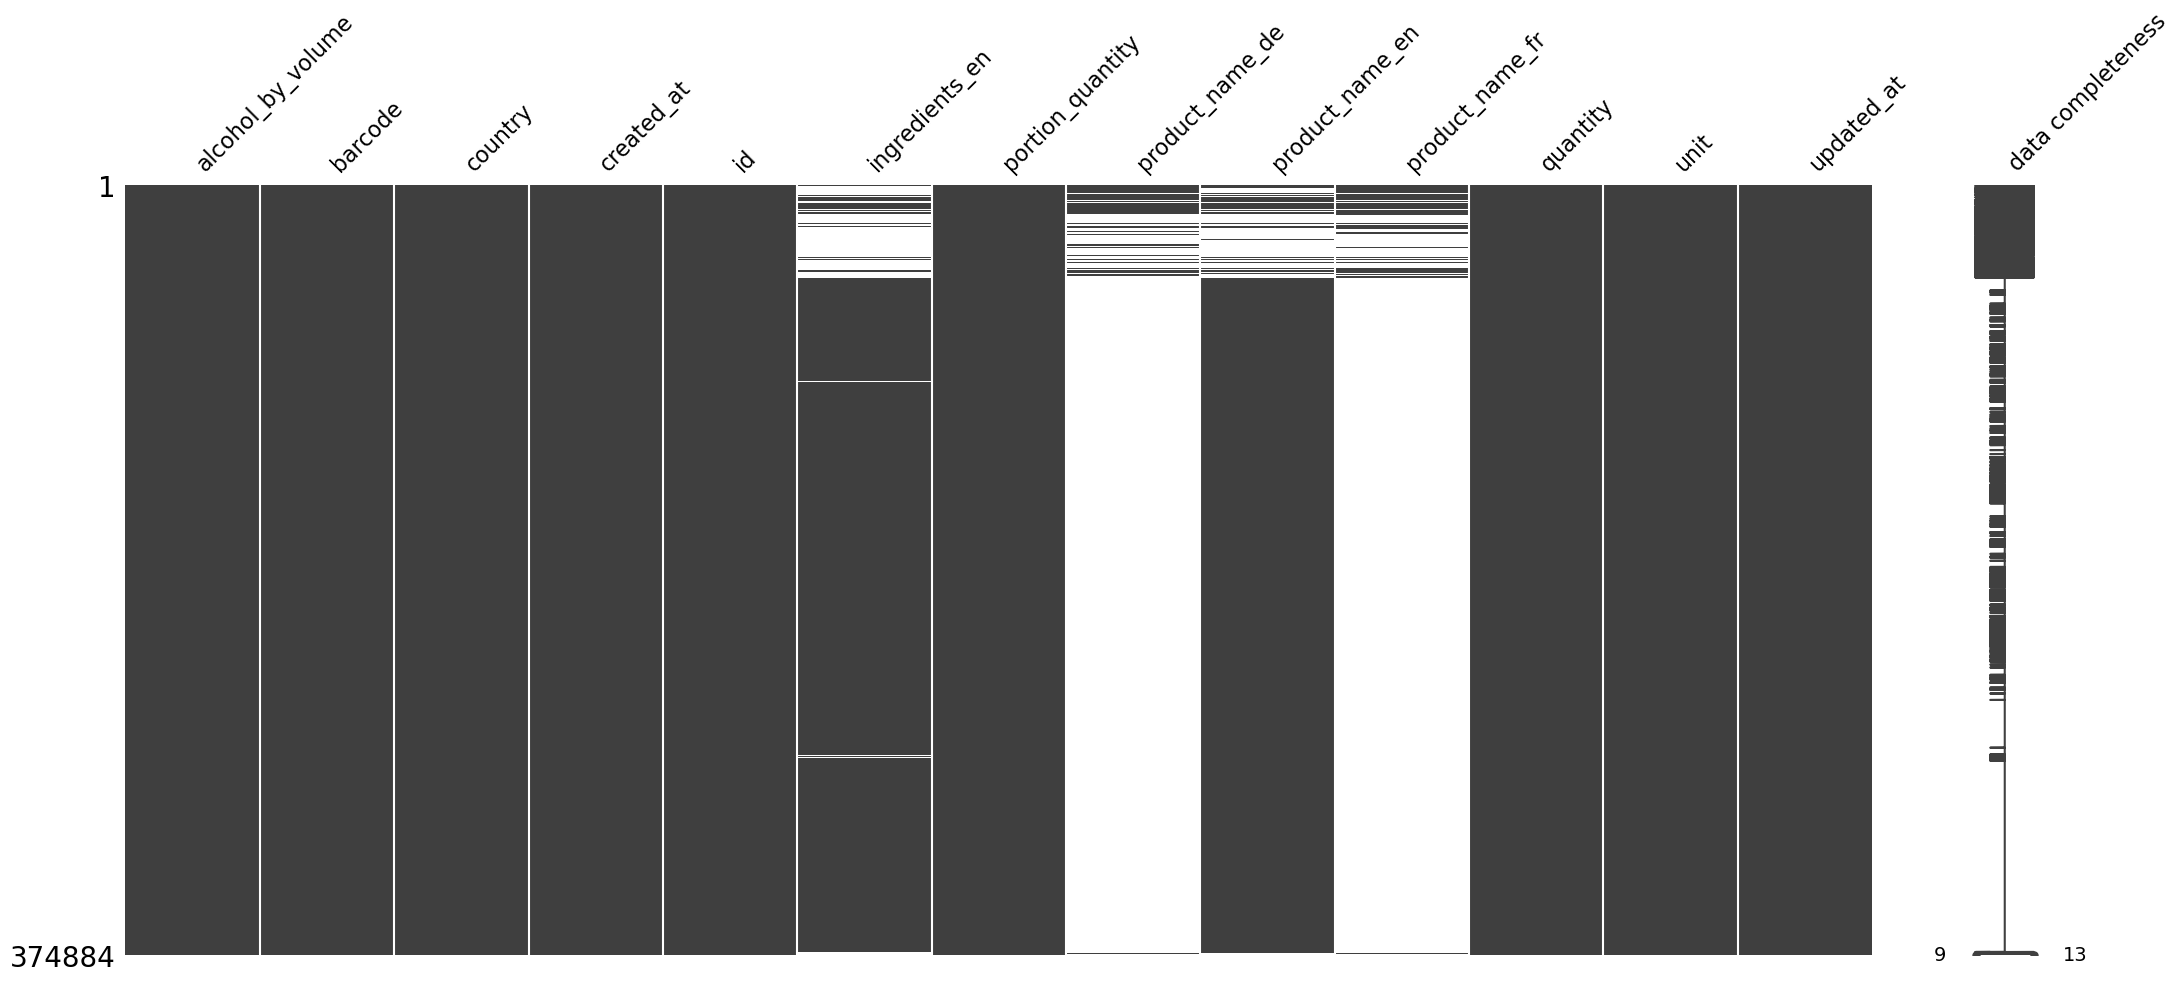

In [30]:
# use missingno on dataframe with other_cols columns
msno.matrix(df.loc[:, other_cols], labels=True)

**3. Address missing values by keeping as much data as possible. At each step report how many samples and features remain.**

**3a) Remove rows and columns that are completely empty (if there is any).**

In [31]:
# dataframe shape
df.shape

(374884, 99)

In [32]:
# drop rows and columns that are completely empty
df = df.dropna(how='all')

# dataframe shape
df.shape

(374884, 99)

There are no rows or columns that are completely empty.

**3b) Fill in the missing values in categorical columns (_unit columns) with the most frequent value.**

In [33]:
# show first 5 entries
df.loc[:, _unit].head()

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0          NaN                  g              NaN            NaN   
1          NaN                  g              NaN            NaN   
2          NaN                  g              NaN            NaN   
3          NaN                  g              NaN            NaN   
4          NaN                  g              NaN            NaN   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                              NaN   
1             kCal          kJ        g                              NaN   
2             kCal          kJ        g                              NaN   
3             kCal          kJ        g                              NaN   
4             kCal          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                          NaN                  NaN                NaN   
1                          NaN                  NaN                NaN   
2                          NaN                  NaN                NaN   
3                          NaN                  NaN                NaN   
4                          NaN                  NaN                NaN   

  fiber_unit folate_total_unit folic_acid_unit hundred_unit iron_unit  \
0        NaN               NaN             NaN            g       NaN   
1          g               NaN             NaN            g       NaN   
2        NaN               NaN             NaN            g       NaN   
3          g               NaN             NaN            g       NaN   
4          g               NaN             NaN            g       NaN   

  magnesium_unit manganese_mn_unit monounsaturated_fatty_acids_unit  \
0            NaN               NaN                              NaN   
1            NaN               NaN                              NaN   
2            NaN               NaN                              NaN   
3            NaN               NaN                              NaN   
4            NaN               NaN                              NaN   

  phosphorus_unit polyunsaturated_fatty_acids_unit portion_unit  \
0             NaN                              NaN            g   
1             NaN                              NaN            g   
2             NaN                              NaN            g   
3             NaN                              NaN            g   
4             NaN                              NaN            g   

  potassium_k_unit protein_unit salt_unit saturated_fat_unit sodium_unit  \
0              NaN            g       NaN                NaN         NaN   
1              NaN            g         g                  g         NaN   
2              NaN            g         g                  g         NaN   
3              NaN            g       NaN                  g         NaN   
4              NaN            g         g                  g         NaN   

  sugars_added_unit sugars_unit vitamin_a_iu_unit vitamin_b12_cobalamin_unit  \
0               NaN         NaN               NaN                        NaN   
1               NaN           g               NaN                        NaN   
2               NaN           g               NaN                        NaN   
3               NaN           g               NaN                        NaN   
4               NaN           g               NaN                        NaN   

  vitamin_b1_thiamin_unit vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                     NaN                        NaN                    NaN   
1                     NaN                        NaN                    NaN   
2                     NaN                        NaN                    NaN   
3                     NaN                        NaN                    NaN   
4                     NaN                        NaN                    NaN   

  v

In [34]:
# fill in the missing values of _unit columns with the most frequent value in each column
for i in range(0, len(_unit)):
    df[_unit[i]].fillna(df[_unit[i]].mode()[0], inplace=True)

In [35]:
# show first 5 entries
df.loc[:, _unit].head()

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0           mg                  g               mg             mg   
1           mg                  g               mg             mg   
2           mg                  g               mg             mg   
3           mg                  g               mg             mg   
4           mg                  g               mg             mg   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                                g   
1             kCal          kJ        g                                g   
2             kCal          kJ        g                                g   
3             kCal          kJ        g                                g   
4             kCal          kJ        g                                g   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                            g                    g                  g   
1                            g                    g                  g   
2                            g                    g                  g   
3                            g                    g                  g   
4                            g                    g                  g   

  fiber_unit folate_total_unit folic_acid_unit hundred_unit iron_unit  \
0          g                µg              µg            g        mg   
1          g                µg              µg            g        mg   
2          g                µg              µg            g        mg   
3          g                µg              µg            g        mg   
4          g                µg              µg            g        mg   

  magnesium_unit manganese_mn_unit monounsaturated_fatty_acids_unit  \
0             mg                mg                                g   
1             mg                mg                                g   
2             mg                mg                                g   
3             mg                mg                                g   
4             mg                mg                                g   

  phosphorus_unit polyunsaturated_fatty_acids_unit portion_unit  \
0              mg                                g            g   
1              mg                                g            g   
2              mg                                g            g   
3              mg                                g            g   
4              mg                                g            g   

  potassium_k_unit protein_unit salt_unit saturated_fat_unit sodium_unit  \
0               mg            g         g                  g           g   
1               mg            g         g                  g           g   
2               mg            g         g                  g           g   
3               mg            g         g                  g           g   
4               mg            g         g                  g           g   

  sugars_added_unit sugars_unit vitamin_a_iu_unit vitamin_b12_cobalamin_unit  \
0                 g           g                IU                         µg   
1                 g           g                IU                         µg   
2                 g           g                IU                         µg   
3                 g           g                IU                         µg   
4                 g           g                IU                         µg   

  vitamin_b1_thiamin_unit vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                      mg                         mg                     mg   
1                      mg                         mg                     mg   
2                      mg                         mg                     mg   
3                      mg                         mg                     mg   
4                      mg                         mg                     mg   

  v

In [36]:
# dataframe shape
df.shape

(374884, 99)

**3c) Fill in the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en column (other_cols).**

In [37]:
# show other_cols list
other_cols

['alcohol_by_volume',
 'barcode',
 'country',
 'created_at',
 'id',
 'ingredients_en',
 'portion_quantity',
 'product_name_de',
 'product_name_en',
 'product_name_fr',
 'quantity',
 'unit',
 'updated_at']

Columns product_name_de and product_name_fr contain similar information as product_name_en.

In [38]:
# number of missing values in the product_name_en column
df['product_name_en'].isnull().sum()

33165

In [39]:
# replace missing product_name_en values with product_name_de values
df['product_name_en'].fillna(value=df['product_name_de'], inplace=True)

In [40]:
# number of missing values in the product_name_en column
df['product_name_en'].isnull().sum()

23689

In [41]:
# replace remaining missing product_name_en values with product_name_fr values
df['product_name_en'].fillna(value=df['product_name_fr'], inplace=True)

In [42]:
# number of missing values in the product_name_en column 
df['product_name_en'].isnull().sum()

18866

The number of missing product_name_en values that were filled in is 14'299 (=33'165-18'866).

**3d) Column iron_per_hundred has about 30% missing values. One possible explanation could be that those products are iron-free. Based on this assumption address the missing values for iron_per_hundred.**

In [43]:
# number of missing values in the iron_per_hundred column
df['iron_per_hundred'].isnull().sum()

110495

In [44]:
# replace the missing values with zero (iron-free)
df['iron_per_hundred'].fillna(value=0, inplace=True)

In [45]:
# number of missing values in the iron_per_hundred column
df['iron_per_hundred'].isnull().sum()

0

There are no longer missing values in the iron_per_hundred column.

**3e) The column ingredients_en has about 10% of missing values. Replace them with the term ingredient_missing.**

In [46]:
# number of missing values in the ingredients_en column
df['ingredients_en'].isnull().sum()

38958

In [47]:
# replace missing values in the ingredients_en column with 'ingredient_missing'
df['ingredients_en'].fillna(value = 'ingredient_missing', inplace = True)

In [48]:
# number of missing values in the ingredients_en column
df['ingredients_en'].isnull().sum()

0

There are no longer missing values in the ingredients_en column.

**3f) Drop the columns that have more than 95% of missing values. What is the shape of the remaining data?**

In [49]:
# drop the columns that have more than 95% of missing value
df = df.dropna(thresh = df.shape[0] * 0.05, axis = 1)

In [50]:
# dataframe shape
df.shape

(374884, 77)

Remaining data has 374'884 samples and 77 features (22 columns were dropped).

## C. Preliminary Exploratory Data Analysis (EDA)

**1. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.**

In [51]:
# dataframe with categorical variables (non-numerical variables)
df_non_numerical = df.select_dtypes(exclude=['number'])

# show first 5 entries
df_non_numerical.head()

barcode calcium_unit carbohydrates_unit cholesterol_unit  \
0  8001772000030           mg                  g               mg   
1  7610809001066           mg                  g               mg   
2  8002530159021           mg                  g               mg   
3  3033715065788           mg                  g               mg   
4  7610848492740           mg                  g               mg   

  copper_cu_unit country                created_at energy_kcal_unit  \
0             mg      CH  2016-06-01T11:42:22.908Z             kCal   
1             mg      CH  2016-06-01T11:42:25.111Z             kCal   
2             mg      CH  2016-06-01T11:42:25.900Z             kCal   
3             mg      CH  2016-06-01T11:42:26.184Z             kCal   
4             mg      CH  2016-06-01T11:42:26.350Z             kCal   

  energy_unit fat_unit fatty_acids_total_saturated_unit  \
0          kJ        g                                g   
1          kJ        g                                g   
2          kJ        g                                g   
3          kJ        g                                g   
4          kJ        g                                g   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                            g                    g                  g   
1                            g                    g                  g   
2                            g                    g                  g   
3                            g                    g                  g   
4                            g                    g                  g   

  fiber_unit folate_total_unit folic_acid_unit hundred_unit  \
0          g                µg              µg            g   
1          g                µg              µg            g   
2          g                µg              µg            g   
3          g                µg              µg            g   
4          g                µg              µg            g   

                                      ingredients_en iron_unit magnesium_unit  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...        mg             mg   
1               Bio Milk (Switzerland), kitchen salt        mg             mg   
2                               100%  coffee Arabica        mg             mg   
3  Powdered chocolate 99% (sugar, cocoa), emulsif...        mg             mg   
4  cocoa paste * (Honduras), raw cane sugar * (Pa...        mg             mg   

  manganese_mn_unit monounsaturated_fatty_acids_unit phosphorus_unit  \
0                mg                                g              mg   
1                mg                                g              mg   
2                mg                                g              mg   
3                mg                                g              mg   
4                mg                                g              mg   

  polyunsaturated_fatty_acids_unit portion_unit potassium_k_unit  \
0                                g            g               mg   
1                                g            g               mg   
2                                g            g               mg   
3                                g            g               mg   
4                                g            g               mg   

                            product_name_de  \
0                           Bio Spaghetti     
1                     Naturaplan Mozzarella   
2                  Caffè Mauro - Bio Kaffe    
3  Le chocolat Cailler -  schokoladenpulver   
4     Naturaplan ExtraDunkle Schokolade 70%   

                              product_name_en  \
0                              Bio Spaghetti    
1                       Naturaplan Mozzarella   
2  Caffè Mauro - Roasted organic coffee blend   
3     Le chocolat Cailler -  chocolate powder   
4         Naturaplan Extra Dark Chocolate 70%   

                             product_name_fr protein_unit salt_unit  \
0         

In [52]:
# number of unique values in categorical variables
df_non_numerical.nunique()

barcode                                     374446
calcium_unit                                     1
carbohydrates_unit                               1
cholesterol_unit                                 1
copper_cu_unit                                   1
country                                          7
created_at                                   46990
energy_kcal_unit                                 1
energy_unit                                      1
fat_unit                                         1
fatty_acids_total_saturated_unit                 1
fatty_acids_total_trans_unit                     1
fiber_insoluble_unit                             1
fiber_soluble_unit                               1
fiber_unit                                       1
folate_total_unit                                1
folic_acid_unit                                  1
hundred_unit                                     3
ingredients_en                              247228
iron_unit                      

<AxesSubplot:title={'center':'Number of samples in each category in the variable country'}>

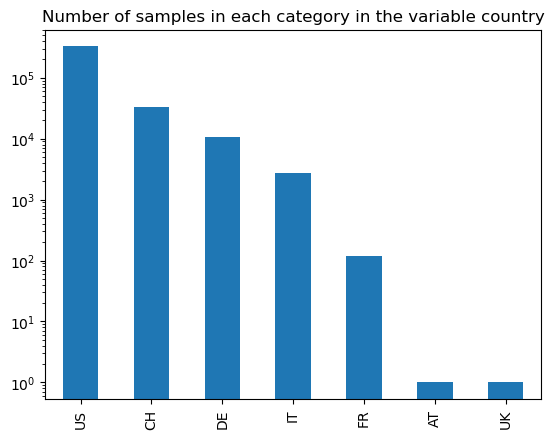

In [53]:
# show number of samples in each categorical level in the variable country
df['country'].value_counts().plot(
    kind='bar',
    logy=True, 
    title='Number of samples in each category in the variable country'
)

<AxesSubplot:title={'center':'Number of samples in each category in the variable unit'}>

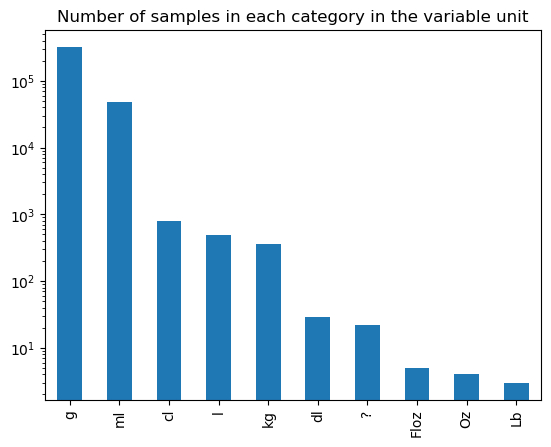

In [54]:
# show number of samples in each categorical level in the variable unit
df['unit'].value_counts().plot(
    kind='bar',
    logy=True, 
    title='Number of samples in each category in the variable unit'
)

**2. Provide descriptive statistics and informative plots of the numerical variables.**

In [55]:
# dataframe with numerical variables
df_numerical = df.select_dtypes(include=['number'])

# show first 5 entries
df_numerical.head()

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
0                0.0                  NaN                      75.00   
1                0.0                  NaN                       1.50   
2                0.0                  NaN                      52.68   
3                0.0                  NaN                      70.40   
4                0.0                  NaN                      37.00   

   cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
0                      NaN                    359.0              1500.0   
1                      NaN                    242.0              1010.0   
2                      NaN                    325.0              1358.3   
3                      NaN                    402.0              1679.0   
4                      NaN                    591.0              2470.0   

   fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
0             0.42                                      NaN   
1            18.00                                      NaN   
2            12.08                                      NaN   
3             7.90                                      NaN   
4            44.00                                      NaN   

   fatty_acids_total_trans_per_hundred  fiber_per_hundred    id  \
0                                  NaN                NaN  1000   
1                                  NaN                0.0  1001   
2                                  NaN                NaN  1002   
3                                  NaN                9.1  1003   
4                                  NaN                9.0  1004   

   iron_per_hundred  monounsaturated_fatty_acids_per_hundred  \
0               0.0                                      NaN   
1               0.0                                      NaN   
2               0.0                                      NaN   
3               0.0                                      NaN   
4               0.0                                      NaN   

   polyunsaturated_fatty_acids_per_hundred  portion_quantity  \
0                                      NaN              50.0   
1                                      NaN              75.0   
2                                      NaN               0.0   
3                                      NaN              17.0   
4                                      NaN              20.0   

   potassium_k_per_hundred  protein_per_hundred  quantity  salt_per_hundred  \
0                      NaN                11.00     500.0               NaN   
1                      NaN                19.00     150.0              0.50   
2                      NaN                19.05    1000.0              0.25   
3                      NaN                 6.80     500.0               NaN   
4                      NaN                 8.00     100.0              0.06   

   saturated_fat_per_hundred  sodium_per_hundred  sugars_added_per_hundred  \
0                        NaN                 NaN                       NaN   
1                      11.00                 NaN                       NaN   
2                       3.03                 NaN                       NaN   
3                       4.20                 NaN                       NaN   
4                      27.00                 NaN                       NaN   

   sugars_per_hundred  vitamin_a_iu_per_hundred  \
0                 NaN                       NaN   
1                1.50                       NaN   
2                0.25                       NaN   
3               65.80                       NaN   
4               29.00                       NaN   

   vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
0                             NaN                                NaN   
1                             NaN                                NaN   
2                             NaN                                NaN   
3                           

In [56]:
# descriptive statistics (min/max/mean) for numerical variables
df_numerical.describe().loc[['min', 'max', 'mean']]

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
min            0.000000             0.000000                   0.000000   
max           57.900000        684000.000000                6400.000000   
mean           0.027911           116.647405                  34.005231   

      cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
min                  0.000000                 0.000000            0.000000   
max             250000.000000             39600.000000       165686.400000   
mean                58.981358               272.484231         1139.512786   

      fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
min          0.000000                                 0.000000   
max       3200.000000                              1000.000000   
mean        12.705385                                 4.943331   

      fatty_acids_total_trans_per_hundred  fiber_per_hundred             id  \
min                              0.000000           0.000000     971.000000   
max                            615.380000        1730.000000  376943.000000   
mean                             0.034861           2.925621  189167.699515   

      iron_per_hundred  monounsaturated_fatty_acids_per_hundred  \
min           0.000000                                 0.000000   
max      769230.770000                               200.000000   
mean          5.374877                                 8.347389   

      polyunsaturated_fatty_acids_per_hundred  portion_quantity  \
min                                   0.00000          0.000000   
max                                 100.00000       3000.000000   
mean                                  5.36593          3.729814   

      potassium_k_per_hundred  protein_per_hundred       quantity  \
min                  0.000000             0.000000       0.000000   
max             925000.000000          5747.000000  230000.000000   
mean               553.944973             7.251008      97.626803   

      salt_per_hundred  saturated_fat_per_hundred  sodium_per_hundred  \
min           0.000000                   0.000000            0.000000   
max          99.800000                 100.000000        25833.330000   
mean          0.985335                   5.904191            1.402169   

      sugars_added_per_hundred  sugars_per_hundred  vitamin_a_iu_per_hundred  \
min                   0.000000            0.000000                  0.000000   
max                1100.000000         5800.000000             333333.000000   
mean                 23.993521           16.992009                494.236708   

      vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
min                         0.000000                           0.000000   
max                      1111.000000                       20000.000000   
mean                        0.925326                           1.680103   

      vitamin_b3_niacin_per_hundred  vitamin_c_ascorbic_acid_per_hundred  \
min                        0.000000                             0.000000   
max                     6785.710000                        210000.000000   
mean                       9.846486                            15.704688   

      vitamin_d_d2_d3_international_units_per_hundred  
min                                          0.000000  
max                                       5000.000000  
mean                                        14.186515

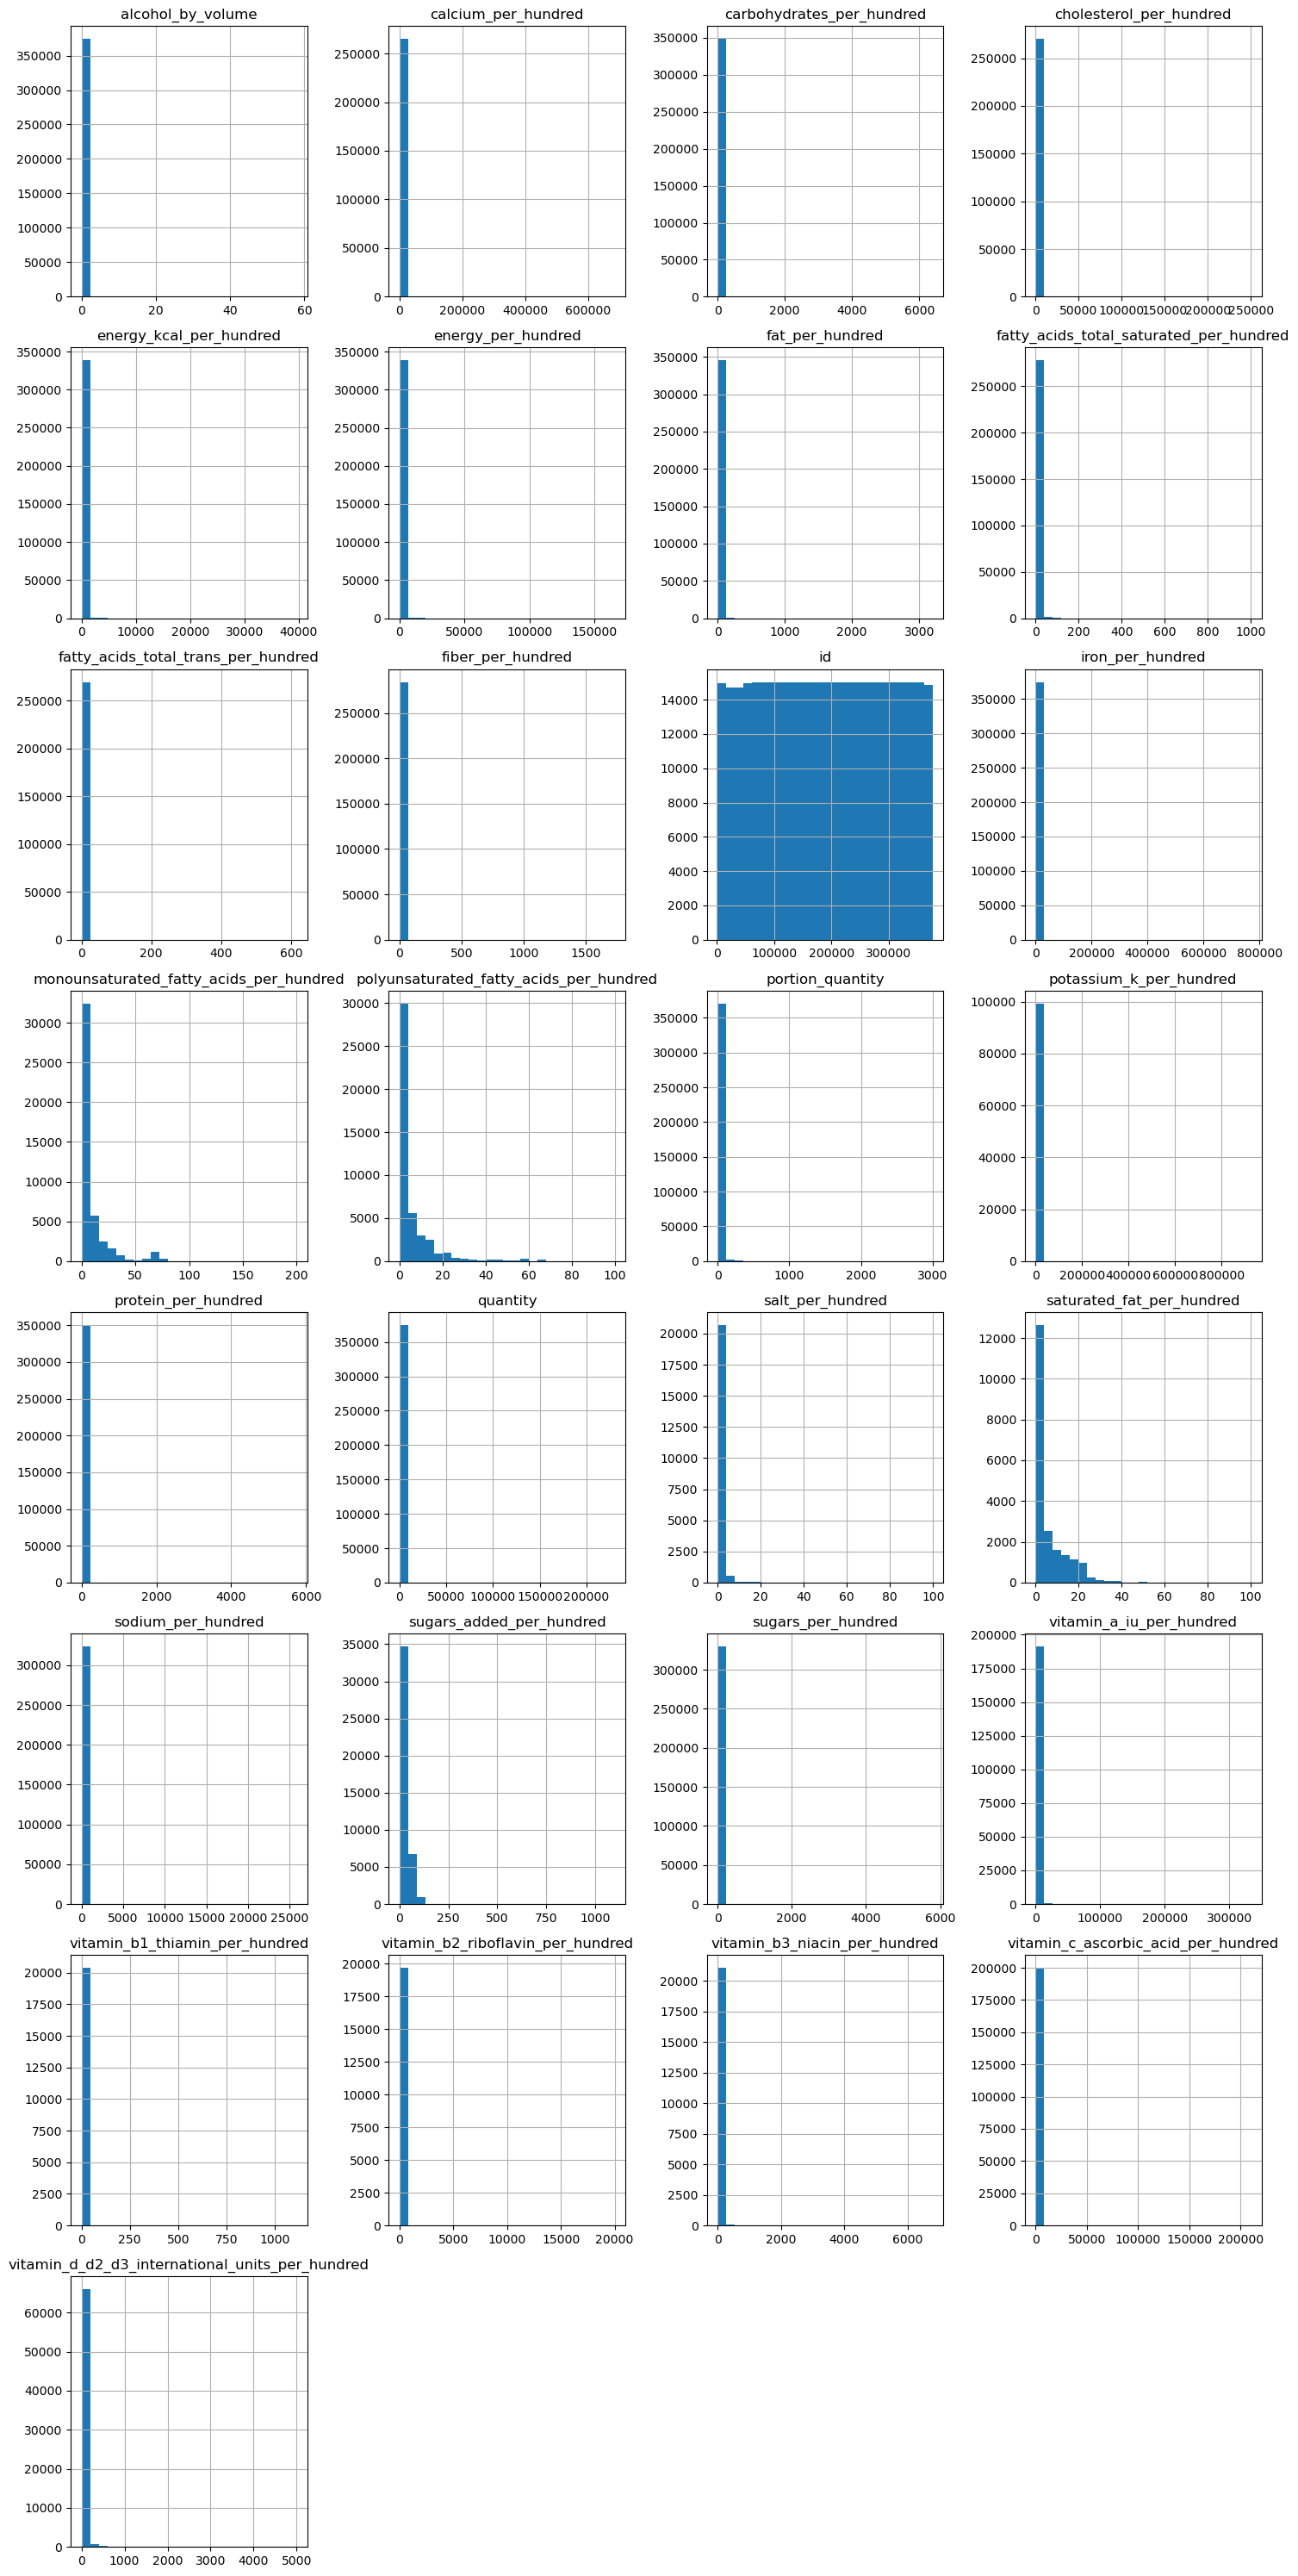

In [57]:
# informative plots (histograms) of the numerical variables
df_numerical.hist(bins=25, figsize=(15,30), layout=(-1,4))

# adjust the padding around subplots
plt.tight_layout()

**3. Using the statistics and plots of the per_hundred columns from previous task, identify and address errors and unrealistic values.**

In [58]:
# create a new list that holds _per_hundred column names
_per_hundred_new = [col for col in df.columns if col.endswith('_per_hundred')]

# show the list
_per_hundred_new

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'cholesterol_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_per_hundred',
 'iron_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_added_per_hundred',
 'sugars_per_hundred',
 'vitamin_a_iu_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_c_ascorbic_acid_per_hundred',
 'vitamin_d_d2_d3_international_units_per_hundred']

In [59]:
# create a new list that holds _unit columns (those corresponding to new _per_hundred list)
_unit_new = []

for i in range(len(_per_hundred_new)):
    unit = _per_hundred_new[i].replace('per_hundred', 'unit')
    _unit_new.append(unit)

# show the list
_unit_new

['calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_unit',
 'iron_unit',
 'monounsaturated_fatty_acids_unit',
 'polyunsaturated_fatty_acids_unit',
 'potassium_k_unit',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'vitamin_a_iu_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_c_ascorbic_acid_unit',
 'vitamin_d_d2_d3_international_units_unit']

In [60]:
# create a new list that holds units from the _unit_new list
units = [df[_unit_new].mode()][0].values.flatten().tolist()

# show the list
units

['mg',
 'g',
 'mg',
 'kCal',
 'kJ',
 'g',
 'g',
 'g',
 'g',
 'mg',
 'g',
 'g',
 'mg',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'IU',
 'mg',
 'mg',
 'mg',
 'mg',
 'IU']

In [61]:
# create a dataframe
df_limit = pd.DataFrame()

# add a column with _per_hundred column names
df_limit['_per_hundred name'] = _per_hundred_new

# add a column with _unit names
df_limit['_unit name'] = _unit_new

# add a column with units
df_limit['unit'] = units

# add a limit column with a max plausible value for each unit
df_limit['limit'] = ''

for i in range(len(df_limit)):
    if df_limit.loc[i]['unit'] == 'g':
        df_limit.loc[i, 'limit'] = 100
        
    elif df_limit.loc[i]['unit'] == 'mg':
        df_limit.loc[i, 'limit'] = 10**5       
        
    elif df_limit.loc[i]['unit'] == 'μg':
        df_limit.loc[i, 'limit'] = 10**8   
        
    elif df_limit.loc[i]['unit'] == 'kJ':
        df_limit.loc[i, 'limit'] = 3700   

    # range for kCal equals range for kJ/4.184
    elif df_limit.loc[i]['unit'] == 'kCal':
        df_limit.loc[i, 'limit'] = 885 
        
    elif df_limit.loc[i]['_unit name'] == 'vitamin_a_iu_unit':
        df_limit.loc[i, 'limit'] = 3.3*10**8  
        
    elif df_limit.loc[i]['_unit name'] == 'vitamin_d_d2_d3_international_units_unit':
        df_limit.loc[i, 'limit'] = 4*10**9 

# show dataframe
df_limit

_per_hundred name  \
0                               calcium_per_hundred   
1                         carbohydrates_per_hundred   
2                           cholesterol_per_hundred   
3                           energy_kcal_per_hundred   
4                                energy_per_hundred   
5                                   fat_per_hundred   
6           fatty_acids_total_saturated_per_hundred   
7               fatty_acids_total_trans_per_hundred   
8                                 fiber_per_hundred   
9                                  iron_per_hundred   
10          monounsaturated_fatty_acids_per_hundred   
11          polyunsaturated_fatty_acids_per_hundred   
12                          potassium_k_per_hundred   
13                              protein_per_hundred   
14                                 salt_per_hundred   
15                        saturated_fat_per_hundred   
16                               sodium_per_hundred   
17                         sugars_added_per_hundred   
18                               sugars_per_hundred   
19                         vitamin_a_iu_per_hundred   
20                   vitamin_b1_thiamin_per_hundred   
21                vitamin_b2_riboflavin_per_hundred   
22                    vitamin_b3_niacin_per_hundred   
23              vitamin_c_ascorbic_acid_per_hundred   
24  vitamin_d_d2_d3_international_units_per_hundred   

                                  _unit name  unit        limit  
0                               calcium_unit    mg       100000  
1                         carbohydrates_unit     g          100  
2                           cholesterol_unit    mg       100000  
3                           energy_kcal_unit  kCal          885  
4                                energy_unit    kJ         3700  
5                                   fat_unit     g          100  
6           fatty_acids_total_saturated_unit     g          100  
7               fatty_acids_total_trans_unit     g          100  
8                                 fiber_unit     g          100  
9                                  iron_unit    mg       100000  
10          monounsaturated_fatty_acids_unit     g          100  
11          polyunsaturated_fatty_acids_unit     g          100  
12                          potassium_k_unit    mg       100000  
13                              protein_unit     g          100  
14                                 salt_unit     g          100  
15                        saturated_fat_unit     g          100  
16                               sodium_unit     g          100  
17                         sugars_added_unit     g          100  
18                               sugars_unit     g          100  
19                         vitamin_a_iu_unit    IU  330000000.0  
20                   vitamin_b1_thiamin_unit    mg       100000  
21                vitamin_b2_riboflavin_unit    mg       100000  
22                    vitamin_b3_niacin_unit    mg       100000  
23              vitamin_c_ascorbic_acid_unit    mg       100000  
24  vitamin_d_d2_d3_international_units_unit    IU   4000000000

In [62]:
# drop the entries higher than the limit value
for i in range(len(df_limit)):
    entries_to_drop = df[df_limit.iloc[i]['_per_hundred name']].gt(df_limit.iloc[i]['limit'])
    # print the number of entries to be dropped
    print(entries_to_drop.sum())
    df = df[~entries_to_drop]

18
1075
21
577
2
24
13
1
6
2
2
0
80
19
0
0
173
2
26
0
0
0
0
1
0


In [63]:
# check descriptive statistics
df.describe().loc[['min', 'max', 'mean']]

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
min            0.000000             0.000000                   0.000000   
max           57.900000         93750.000000                 100.000000   
mean           0.028063            97.374106                  33.328116   

      cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
min                  0.000000                 0.000000            0.000000   
max             100000.000000               885.000000         3700.000000   
mean                42.629489               267.863864         1120.574769   

      fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
min          0.000000                                 0.000000   
max        100.000000                               100.000000   
mean        12.461857                                 4.847188   

      fatty_acids_total_trans_per_hundred  fiber_per_hundred             id  \
min                              0.000000           0.000000     971.000000   
max                             53.570000         100.000000  376943.000000   
mean                             0.031786           2.883091  188479.823488   

      iron_per_hundred  monounsaturated_fatty_acids_per_hundred  \
min           0.000000                                 0.000000   
max       26666.670000                               100.000000   
mean          2.358348                                 8.128797   

      polyunsaturated_fatty_acids_per_hundred  portion_quantity  \
min                                  0.000000           0.00000   
max                                100.000000        3000.00000   
mean                                 5.206275           3.74819   

      potassium_k_per_hundred  protein_per_hundred       quantity  \
min                  0.000000             0.000000       0.000000   
max              99000.000000           100.000000  230000.000000   
mean               282.181481             7.129861      97.791261   

      salt_per_hundred  saturated_fat_per_hundred  sodium_per_hundred  \
min           0.000000                    0.00000            0.000000   
max          99.800000                  100.00000          100.000000   
mean          0.986416                    5.83003            0.701309   

      sugars_added_per_hundred  sugars_per_hundred  vitamin_a_iu_per_hundred  \
min                   0.000000            0.000000                  0.000000   
max                 100.000000          100.000000             333333.000000   
mean                 23.526601           16.585112                492.010768   

      vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
min                         0.000000                           0.000000   
max                      1111.000000                       20000.000000   
mean                        0.922061                           1.676363   

      vitamin_b3_niacin_per_hundred  vitamin_c_ascorbic_acid_per_hundred  \
min                        0.000000                             0.000000   
max                     6785.710000                         71428.600000   
mean                       9.794059                            14.440847   

      vitamin_d_d2_d3_international_units_per_hundred  
min                                          0.000000  
max                                       5000.000000  
mean                                        13.999058

Maximum values no longer exceed the plausible range of _per_hundred features.

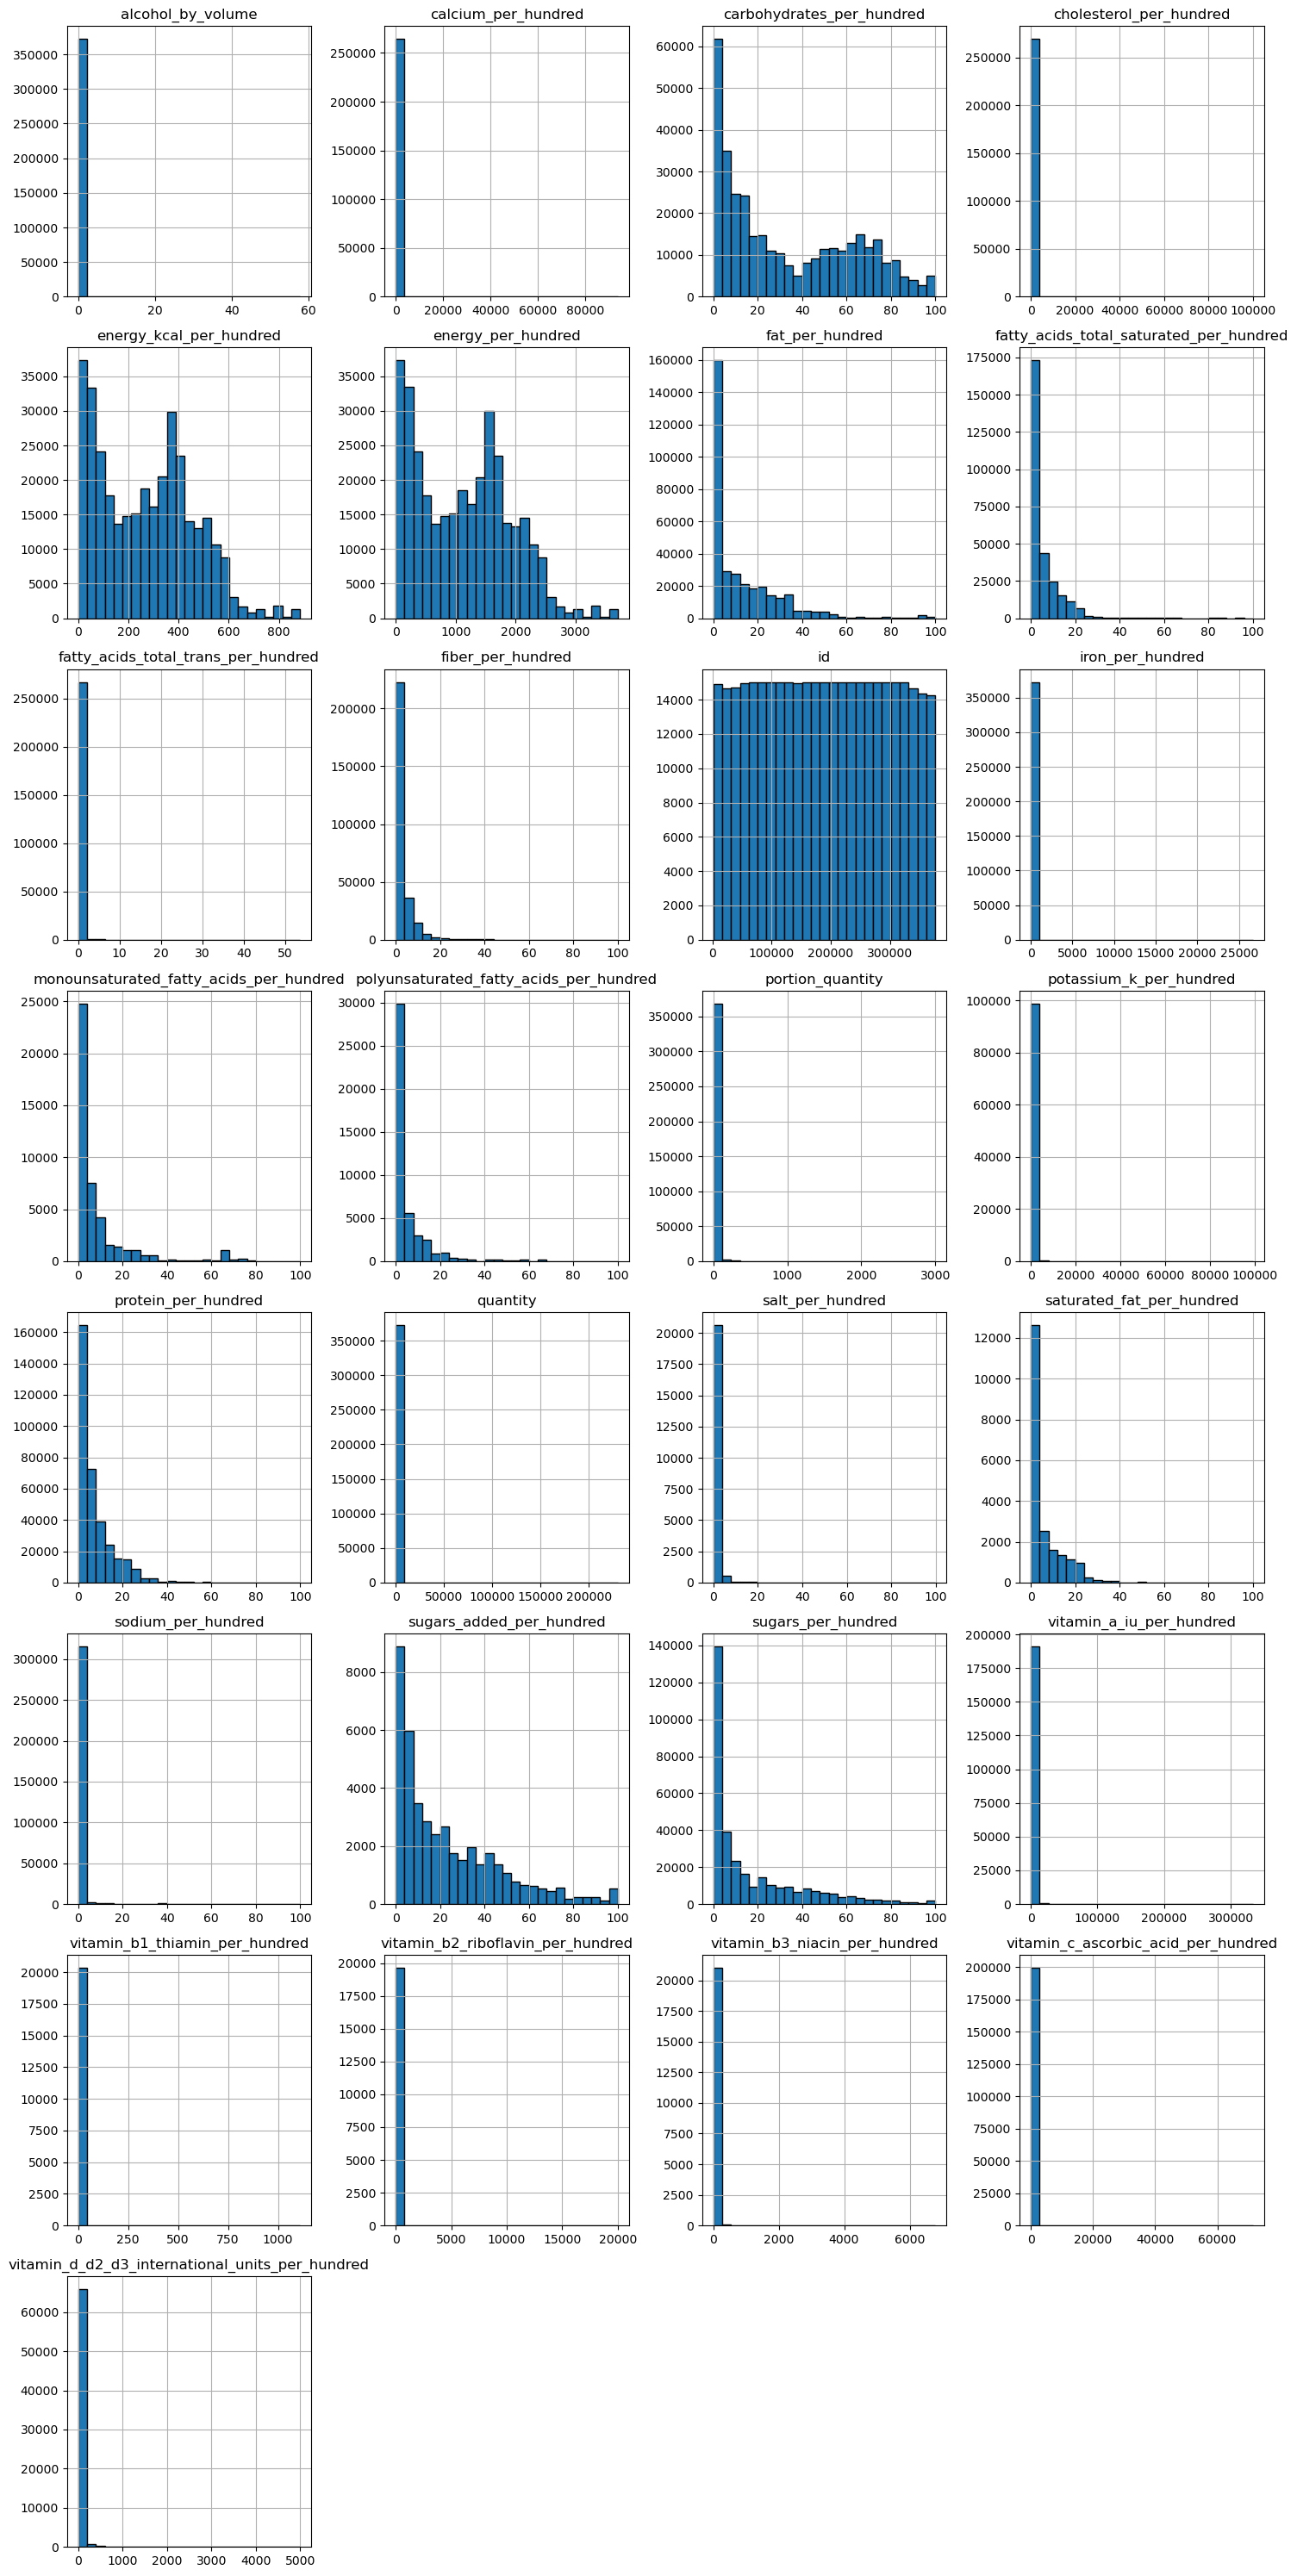

In [64]:
# informative plots (histograms) of the numerical variables
df.hist(bins=25, figsize=(15,30), layout=(-1,4), edgecolor='black')

# adjust the padding around subplots
plt.tight_layout()

Informative plots of numerical variables look good too.

In [65]:
# dataframe shape
df.shape

(372842, 77)

2042 samples (=374884-372842) were dropped because their _per_hundred values were not plausible.

**4a) Analyse the relationship of columns energy_per_hundred (in kJ) and energy_kcal_per_hundred (in kCal).**

<AxesSubplot:xlabel='energy_kcal_per_hundred', ylabel='energy_per_hundred'>

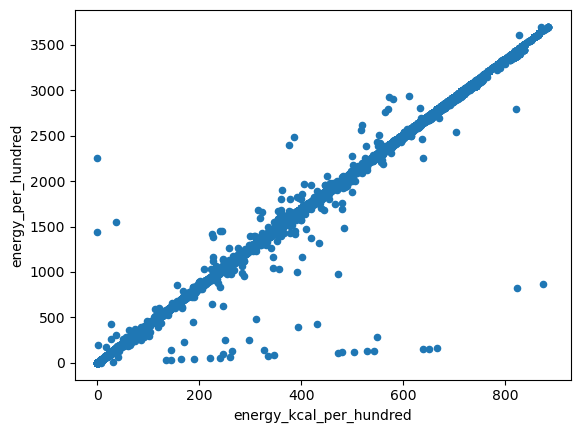

In [66]:
# scatter plot of energy_per_hundred and energy_kcal_per_hundred
df.plot.scatter(x='energy_kcal_per_hundred', y='energy_per_hundred')

The relationship is mostly linear as expected (kCal = 4.184 * kJ) with some errors.

In [67]:
# find samples where relationship is not in the range [4.084, 4.284]
to_drop = (df['energy_per_hundred'] / df['energy_kcal_per_hundred'] < 4.084) | \
(df['energy_per_hundred'] / df['energy_kcal_per_hundred'] > 4.284)

# drop these samples
df = df[~to_drop]

In [68]:
# dataframe shape
df.shape

(371652, 77)

1'190 samples (372'842 - 371'652) were dropped because the relationship kCal-kJ was not in the range [4.084, 4.284].

<AxesSubplot:xlabel='energy_kcal_per_hundred', ylabel='energy_per_hundred'>

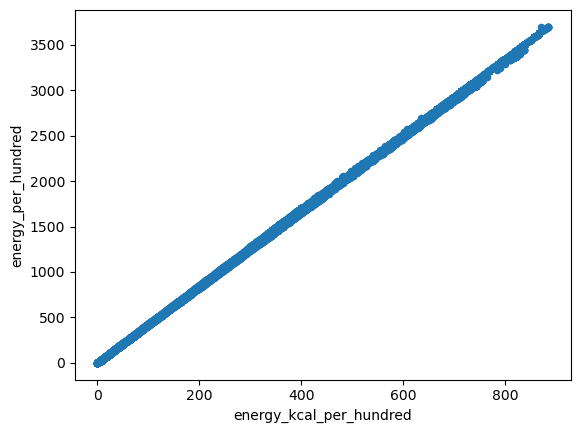

In [69]:
# check the scatter plot
df.plot.scatter(x='energy_kcal_per_hundred', y='energy_per_hundred')

The relationship is linear and without errors that were seen before.

**4b) The column energy_per_hundred is also related to the macronutrient columns (protein, fat, carbohydrates, salt, and fiber). Check these columns for potential inconsistency.**

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

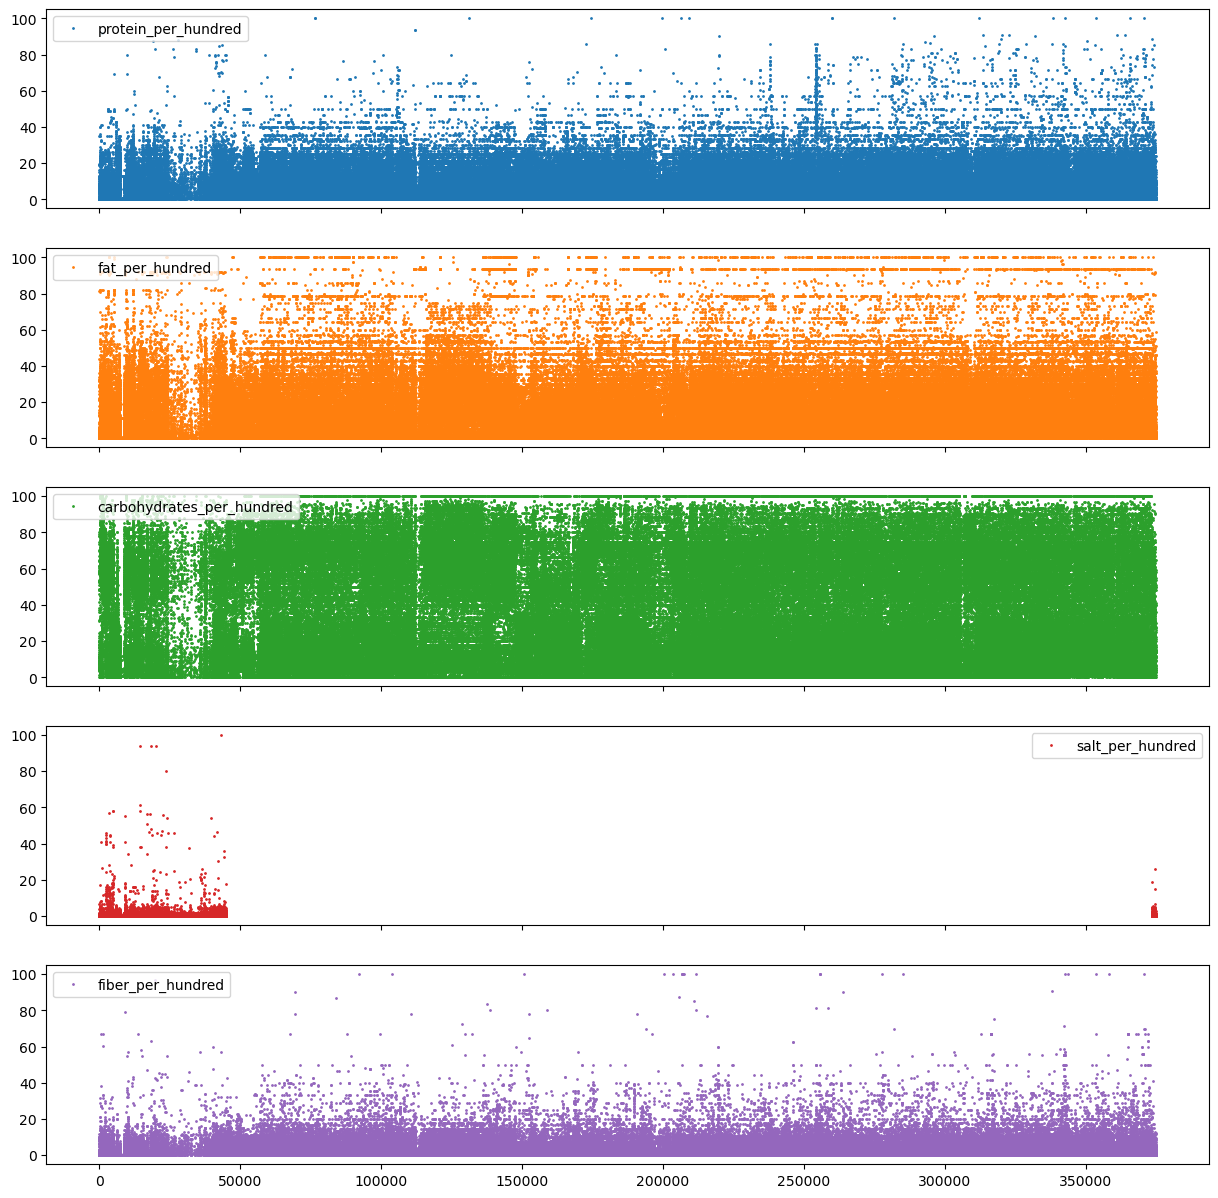

In [70]:
# plot protein, fat, carbohydrates, salt and fiber features as subplots
df[['protein_per_hundred', 
    'fat_per_hundred', 
    'carbohydrates_per_hundred', 
    'salt_per_hundred',
    'fiber_per_hundred']].plot(lw=0, marker='.', subplots=True, figsize=(15, 15), markersize=2)

In [71]:
# count values in the column 'salt_per_hundred'
df['salt_per_hundred'].count()

20425

Column salt_per_hundred has around 20'000 values, the rest is missing as it can be seen on the subplot above. The other 4 columns seem to be consistent.

**4c) The main macronutrients (protein, fat, carbohydrates, and fiber) make up the bulk of a product. However, the overall contribution per hundred gram is limited by the presence of other macronutrients. Check for inconsistency.**

Energy content of main macronutrients:
- fat: 37 kJ/g
- protein: 17 kJ/g
- carbohydrates: 17 kJ/g
- fiber: 8 kJ/g
- salt: 0.5 kJ/g

In [72]:
# create a new dataframe
df_energy = pd.DataFrame()

# add columns with fat, protein, carbohydrates, fiber, salt and energy values
df_energy['fat'] = df.fat_per_hundred
df_energy['protein'] = df.protein_per_hundred
df_energy['carbohydrates'] = df.carbohydrates_per_hundred
df_energy['fiber'] = df.fiber_per_hundred
df_energy['salt'] = df.salt_per_hundred
df_energy['energy'] = df.energy_per_hundred

# add a column with energy1 calculated from fat, protein, carbohydrates and fiber
df_energy['energy1'] = df_energy['fat']*37 + df_energy['protein']*17 + \
df_energy['carbohydrates']*17 + df_energy['fiber']*8

# add a column with energy2 calculated from fat, protein, carbohydrates, fiber and salt
df_energy['energy2'] = df_energy['fat']*37 + df_energy['protein']*17 + \
df_energy['carbohydrates']*17 + df_energy['fiber']*8 + df_energy['salt']*0.5

In [73]:
# show first 5 entries
df_energy.head()

fat  protein  carbohydrates  fiber  salt  energy  energy1  energy2
0   0.42    11.00          75.00    NaN   NaN  1500.0      NaN      NaN
1  18.00    19.00           1.50    0.0  0.50  1010.0   1014.5  1014.75
2  12.08    19.05          52.68    NaN  0.25  1358.3      NaN      NaN
3   7.90     6.80          70.40    9.1   NaN  1679.0   1677.5      NaN
4  44.00     8.00          37.00    9.0  0.06  2470.0   2465.0  2465.03

<AxesSubplot:xlabel='energy', ylabel='energy1'>

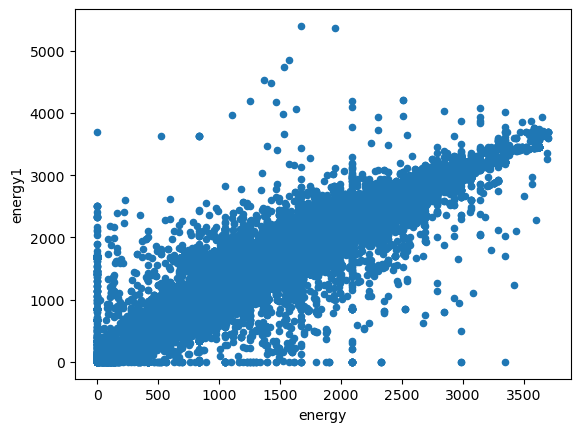

In [74]:
# scatter plot of energy_per_hundred and calculated energy1
df_energy.plot.scatter(x='energy', y='energy1')

<AxesSubplot:xlabel='energy', ylabel='energy2'>

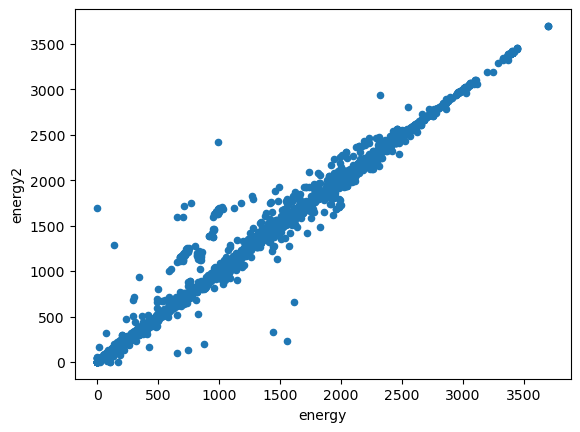

In [75]:
# scatter plot of energy_per_hundred and calculated energy2
df_energy.plot.scatter(x='energy', y='energy2')

Energy1 was calculated using 4 main macronutrients, while energy2 was calculated using 4 main macronutrients and salt.

Scatterplot with energy2 is more linear than with energy1. This shows that other macronutrients such as salt have impact on overall energy.

**5. Despite removing recording errors from the per_hundred columns, some of them still contain "extreme" values, which are distinct from the rest of the data points. Pick a few variables from the per_hundred list and address outliers.**

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

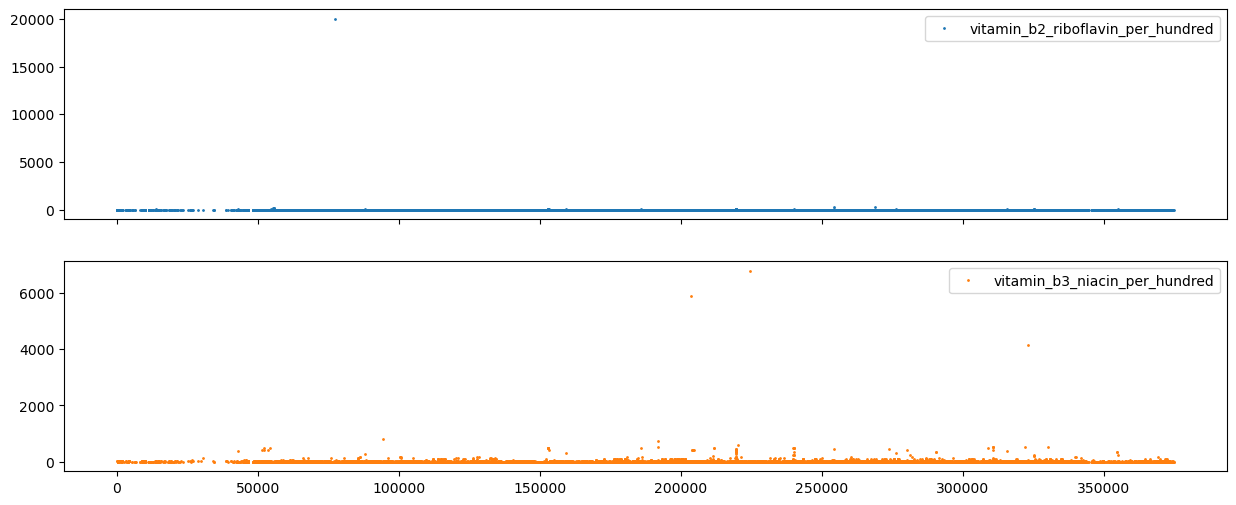

In [76]:
# plot as subplots vitamin b2 and b3 features
df[['vitamin_b2_riboflavin_per_hundred', 
    'vitamin_b3_niacin_per_hundred']].plot(
    lw=0, marker='.', subplots=True, figsize=(15, 6), markersize=2)

Vitamin b2 has 1 outlier with the value above 15'000, and vitamin b3 has 3 outliers with values above 3'000.

In [77]:
# remove vitamin b2 values higher than 15'000 from the dataframe
drop_b2=df['vitamin_b2_riboflavin_per_hundred'].gt(15000)
df=df[~drop_b2]

In [78]:
# remove vitamin b3 values higher than 3000 from the dataframe
drop_b3=df['vitamin_b3_niacin_per_hundred'].gt(3000)
df=df[~drop_b3]

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

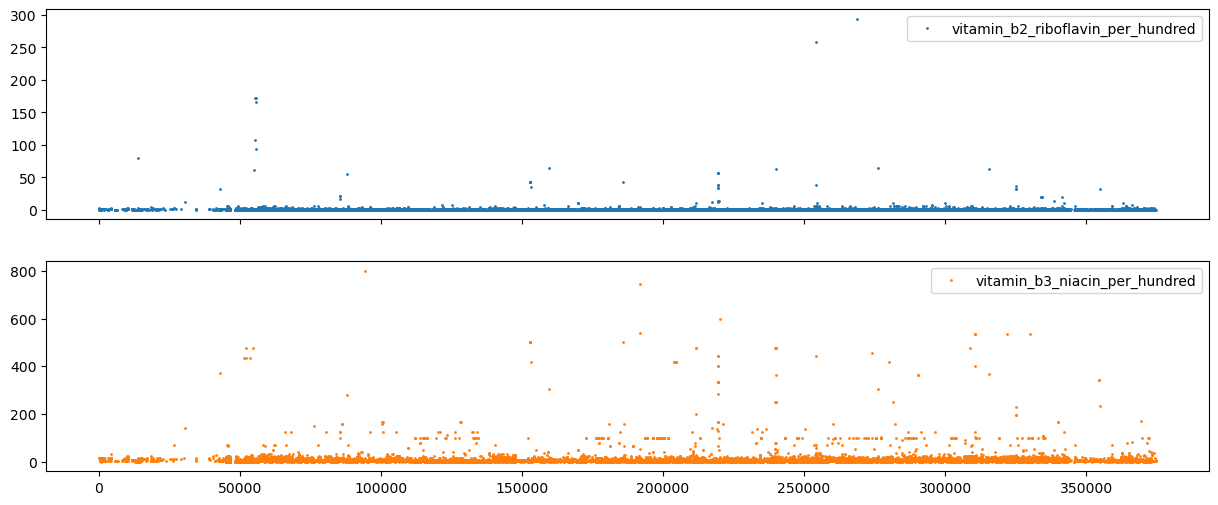

In [79]:
# check vitamin b2 and b3 subplots
df[['vitamin_b2_riboflavin_per_hundred', 
    'vitamin_b3_niacin_per_hundred']].plot(
    lw=0, marker='.', subplots=True, figsize=(15, 6), markersize=2)

Vitamin b2 and vitamin b3 no longer have outliers.

In [80]:
# dataframe shape
df.shape

(371648, 77)

4 rows were dropped from the dataframe (1 vitamin b2 outlier and 3 vitamin b3 outliers).

## D. Text data

**1. Find the product with the longest ingredients list, i.e. the largest number of ingredients. Print the product name and its ingredient list.**

In [81]:
# create series with ingredients_en column
s = df['ingredients_en']

# check one entry
print(s[121099])

INGREDIENTS CONSIST OF WHITE CHOCOLATE {SUGAR, COCOA BUTTER, WHOLE MILK, SOY LECITHIN (AN EMULSIFIER), ARTIFICIAL FLAVOR, SALT}, CHOCOLATE {SUGAR, CHOCOLATE, CHOCOLATE PROCESSED WITH ALKALI, COCOA BUTTER, WHOLE MILK, MILK FAT, SOY LECITHIN (AN EMULSIFIER), VANILLIN (AN ARTIFICIAL FLAVOR)}, CONDENSED MILK, BUTTER, COOKIE DOUGH CAKE MIX {ENRICHED WHEAT FLOUR (WHEAT FLOUR, NIACIN, REDUCED IRON, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID), BROWN SUGAR, SUGAR, SALT, XANTHAN GUM}, PEANUT BUTTER (DRY ROASTED PEANUTS, HYDROGENATED COTTONSEED/RAPESEED OIL, SOY OIL, SALT}, SUGAR, CORN SYRUP, YELLOW CAKE MIX {SUGAR, ENRICHED WHEAT FLOUR (WHEAT FLOUR, NIACIN, REDUCED IRON, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID), DRIED WHOLE EGG, SALT, NATURAL FLAVOR, NONFAT MILK SOLIDS, XANTHAN GUM, SPICES, ANNATTO COLOR}, WHITE CAKE MIX {SUGAR, ENRICHED WHEAT FLOUR (WHEAT FLOUR, NIACIN, REDUCED IRON, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID), EGG WHITE, SALT, NATURAL FLAVOR, NONFAT MILK SOLIDS, XANTH

In [82]:
# keep the text in curly and square brackets, as these are ingredients
# remove the text in the round brackets, as these are not ingredients
# remove whitespace, 'and' and special characters such as stars

# convert to lower case
s = s.str.lower()

# replace escape character with empty space
s = s.str.replace("\r", " ", regex=True)

# replace new line character with empty space
s = s.str.replace("\n", " ", regex=True)

# replace dots with comma if it's not a decimal number
s = s.replace("\.\s+", ", ", regex=True)

# replace opening curly brackets with comma
# remove closing curly brackets
s = s.str.replace(" {", ", ", regex=True)
s = s.str.replace("}", "", regex=True)

# replace opening square brackets with comma
# remove closing square brackets
s = s.str.replace("[", ", ", regex=True)
s = s.str.replace("]", "", regex=True)

# remove round brackets and text inside them
s = s.str.replace("\([^()]*\)", ",", regex=True)

# remove round brackets that are a typing error
s = s.str.replace("(", "", regex=True)
s = s.str.replace(")", "", regex=True)

# remove stars
s = s.str.replace("*", "", regex=True)

# remove 'and'
s = s.str.replace("and ", "", regex=True)

# replace double comma with comma
s = s.str.replace(",,", ",", regex=True)

# remove extra space before comma
s = s.str.replace(" ,", ",", regex=True)

# remove trailing comma
s = s.str.rstrip(',')

# remove dot at the end of the entry
s = s.replace("\.$", "", regex=True)

# remove any leading, and trailing whitespaces
s = s.str.strip()

# check one entry
print(s[121099])

ingredients consist of white chocolate, sugar, cocoa butter, whole milk, soy lecithin, artificial flavor, salt, chocolate, sugar, chocolate, chocolate processed with alkali, cocoa butter, whole milk, milk fat, soy lecithin, vanillin, condensed milk, butter, cookie dough cake mix, enriched wheat flour, brown sugar, sugar, salt, xanthan gum, peanut butter dry roasted peanuts, hydrogenated cottonseed/rapeseed oil, soy oil, salt, sugar, corn syrup, yellow cake mix, sugar, enriched wheat flour, dried whole egg, salt, natural flavor, nonfat milk solids, xanthan gum, spices, annatto color, white cake mix, sugar, enriched wheat flour, egg white, salt, natural flavor, nonfat milk solids, xanthan gum, red velvet cake mix, sugar, enriched wheat flour, cocoa processed with alkali, egg white, salt, natural flavor, nonfat milk solids, xanthan gum, fd&c red #40, carrot cake mix, sugar, enriched wheat flour, dried whole egg, spices, carrot powder, salt, nonfat milk solids, natural flavor, xanthan gum,

In [83]:
# split each string around comma
df_ingredients = s.str.split(", ", expand=True)

# check one entry
df_ingredients.loc[121099, :].values.flatten().tolist()

['ingredients consist of white chocolate',
 'sugar',
 'cocoa butter',
 'whole milk',
 'soy lecithin',
 'artificial flavor',
 'salt',
 'chocolate',
 'sugar',
 'chocolate',
 'chocolate processed with alkali',
 'cocoa butter',
 'whole milk',
 'milk fat',
 'soy lecithin',
 'vanillin',
 'condensed milk',
 'butter',
 'cookie dough cake mix',
 'enriched wheat flour',
 'brown sugar',
 'sugar',
 'salt',
 'xanthan gum',
 'peanut butter dry roasted peanuts',
 'hydrogenated cottonseed/rapeseed oil',
 'soy oil',
 'salt',
 'sugar',
 'corn syrup',
 'yellow cake mix',
 'sugar',
 'enriched wheat flour',
 'dried whole egg',
 'salt',
 'natural flavor',
 'nonfat milk solids',
 'xanthan gum',
 'spices',
 'annatto color',
 'white cake mix',
 'sugar',
 'enriched wheat flour',
 'egg white',
 'salt',
 'natural flavor',
 'nonfat milk solids',
 'xanthan gum',
 'red velvet cake mix',
 'sugar',
 'enriched wheat flour',
 'cocoa processed with alkali',
 'egg white',
 'salt',
 'natural flavor',
 'nonfat milk solids',

In [84]:
# maximal number of ingredients (unique values)
max_number = max(df_ingredients.nunique(axis=1))

# find index of the product with the maximal number of ingredients (unique values)
df_ingredients[df_ingredients.nunique(axis=1) == max_number].index

Int64Index([47537, 253284], dtype='int64')

Two products that have the longest ingredient list are those with index 47537 and 253284.

In [85]:
# product name with index 47537
df['product_name_en'].loc[47537]

'BANQUET Pepperoni Stuffed Breadstick, 4.66 OZ'

In [86]:
# list of ingredients (unique values)
set(df_ingredients.loc[47537, :].dropna())

{'ammonium chloride',
 'anchovies',
 'ascorbic acid',
 'baking powder',
 'beef',
 'bha',
 'bht',
 'bleached enriched wheat flour',
 'calcium pantothenate',
 'calcium sulfate',
 'caramel color',
 'casein',
 'cheese',
 'chili pepper extract',
 'citric acid',
 'citric acid dextrose',
 'cloves',
 'contains 2% or less of: seasoning',
 'contains less than 2% of: modified corn starch',
 'contains: wheat',
 'copper gluconate',
 'cornstarch',
 'crushed garlic',
 'culture',
 'cyanocobalamin',
 'dehydrated onion',
 'dextrose',
 'disodium phosphate',
 'dough conditioner',
 'enzymes',
 'ferrous sulfate',
 'fish,',
 'flavoring',
 'folic acid',
 'garlic',
 'garlic powder',
 'guar xanthan gum',
 'high fructose corn syrup',
 'ingredient not in regular pepperoni',
 'l-cysteine',
 'lactic acid',
 'magnesium oxide',
 'malted barley flour',
 'marinara dipping sauce water',
 'may contain ascorbic acid',
 'methylcellulose',
 'milk',
 'milk protein concentrate',
 'milk solids',
 'modified corn starch',
 'modi

**2. Find the products with the shortest ingredients list, i.e. the fewest ingredients. Display some examples and comment on your observation.**

In [87]:
# minimal number of ingredients (unique values)
min_number = min(df_ingredients.nunique(axis=1))

# find index of the product with the minimal number of ingredients (unique values)
df_ingredients[df_ingredients.nunique(axis=1) == min_number].index

Int64Index([     2,      5,      7,      8,     11,     12,     16,     18,
                23,     26,
            ...
            374872, 374873, 374874, 374875, 374876, 374877, 374878, 374879,
            374882, 374883],
           dtype='int64', length=65353)

There are more than 65'000 products with only one entry in the ingredient list.

In [88]:
# two examples
print(df['product_name_en'].loc[2])
print(df['product_name_en'].loc[5])

Caffè Mauro - Roasted organic coffee blend
Cailler - Kakaopulver


In [89]:
# list of ingredients (unique values)
print(set(df_ingredients.loc[2, :].dropna()))
print(set(df_ingredients.loc[5, :].dropna()))

{'100%  coffee arabica'}
{'cocoa powder'}


In [90]:
# number of products with 'ingredient_missing' value
(df_ingredients[0]=='ingredient_missing').sum()

38079

There are many products with the 'ingredient_missing' value, that was added in the section B (data cleaning).

**3. Which are the most frequent ingredients in products? Choose an appropriate method to visualize your findings.**

In [91]:
# create one string that holds ingredients from all products
s1 = s.str.cat(sep=', ')

In [92]:
# count most frequent ingredients in the string (top 10)
from collections import Counter
Counter(s1.split(', ')).most_common(10)

[('salt', 158944),
 ('sugar', 126730),
 ('water', 112792),
 ('citric acid', 61943),
 ('natural flavor', 40740),
 ('corn syrup', 38807),
 ('ingredient_missing', 38079),
 ('soy lecithin', 36423),
 ('sea salt', 32635),
 ('spices', 30728)]

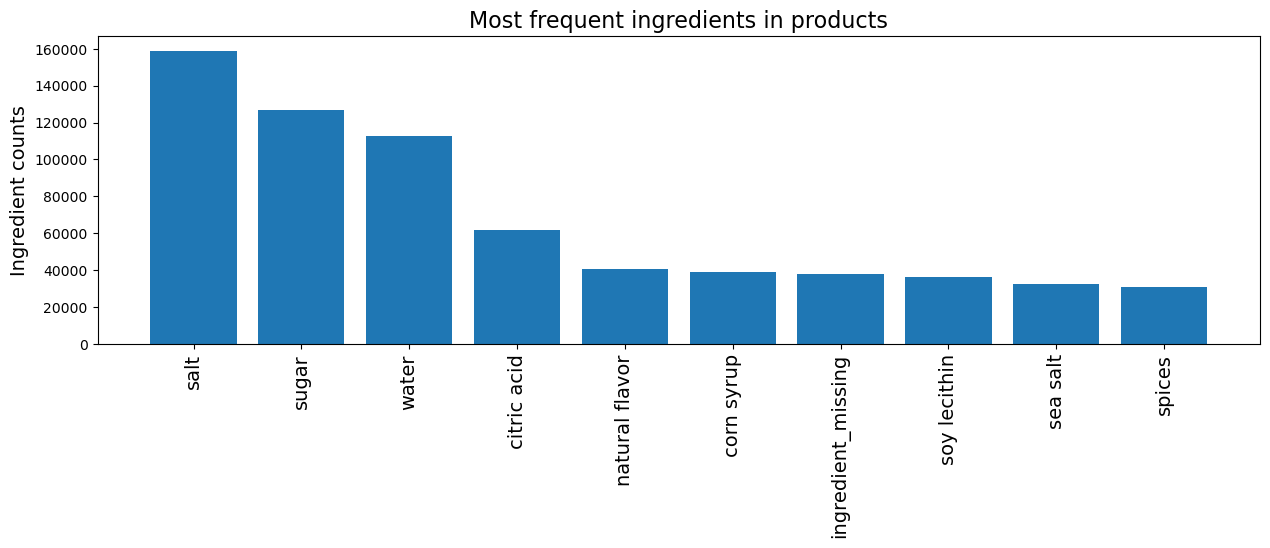

In [93]:
# barplot with top 10 most common ingredients
w = Counter(s1.split(', ')).most_common(10)

plt.figure(figsize=(15,4))
plt.bar(*zip(*w))
plt.title('Most frequent ingredients in products', fontsize = 16)
plt.ylabel('Ingredient counts', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

## E. EDA: Time-series data

**1. Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x-axis and the months (1 to 12) on the y-axis.**

In [94]:
# dataframe with created_at values
df_e1 = df['created_at'].to_frame()

# add column with hour values
df_e1['hour'] = pd.DatetimeIndex(df_e1['created_at']).hour

# add column with month values
df_e1['month'] = pd.DatetimeIndex(df_e1['created_at']).month

# show first 5 entries
df_e1.head()

created_at  hour  month
0  2016-06-01T11:42:22.908Z    11      6
1  2016-06-01T11:42:25.111Z    11      6
2  2016-06-01T11:42:25.900Z    11      6
3  2016-06-01T11:42:26.184Z    11      6
4  2016-06-01T11:42:26.350Z    11      6

In [95]:
# group by hour and month and count the number of items
df_e1 = df_e1.groupby(['hour', 'month']).agg('count').reset_index()

# rename column created_at to number_of_items
df_e1.rename(columns = {'created_at':'number_of_items'}, inplace = True)

# show first 5 entries
df_e1.head()

hour  month  number_of_items
0     0      6                4
1     0      7              379
2     0      8               19
3     1      4                8
4     1      7               95

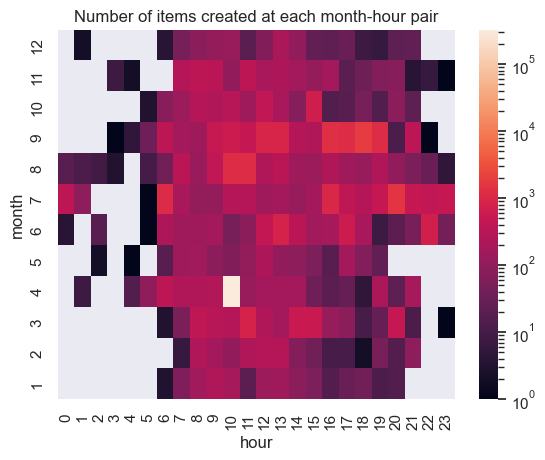

In [96]:
# seaborn heatmap showing the number of items created at each month-hour pair
from matplotlib.colors import LogNorm
sns.set()
df_e1 = df_e1.pivot('month', 'hour', 'number_of_items')
ax = sns.heatmap(df_e1, norm=LogNorm())
plt.title('Number of items created at each month-hour pair')
ax.invert_yaxis()
plt.show()

The number of items created at each hour before 5:00 and after 22:00 is not that high.

The number of items created at each hour from 6:00 to 21:00 is between 100 and 1000.

The only exception is the number of items created at 10:00 in the 4th month that is higher than 100'000.

**2. Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (yyyy-mm format) on the x-axis and the total number of items created during each month on the x-axis.**

In [97]:
# dataframe with created_at values
df_e2 = df['created_at'].to_frame()

# add column with country values
df_e2['country'] = df['country']

# add column with yyyy-mm values
df_e2['year_month'] = df_e2.created_at.str[:7]

# show first 5 entries
df_e2.head()

created_at country year_month
0  2016-06-01T11:42:22.908Z      CH    2016-06
1  2016-06-01T11:42:25.111Z      CH    2016-06
2  2016-06-01T11:42:25.900Z      CH    2016-06
3  2016-06-01T11:42:26.184Z      CH    2016-06
4  2016-06-01T11:42:26.350Z      CH    2016-06

In [98]:
# groupby yyyy-mm and country, and count the number of items
df_e2 = df_e2.groupby(['year_month', 'country']).agg('count').reset_index()

# rename column 'created_at' to 'number of items'
df_e2.rename(columns = {'created_at':'number_of_items'}, inplace = True)

# show first 5 entries
df_e2.head()

year_month country  number_of_items
0    2016-05      CH               20
1    2016-06      CH             1023
2    2016-07      CH             7145
3    2016-08      CH              290
4    2016-09      CH             5146

In [99]:
# create pivot table with yyyy-mm index, country columns and number_of_items values
df_e2_pivot = df_e2.pivot(index='year_month', columns='country', values='number_of_items')

# drop AT and UK columns that have only one item
df_e2_pivot.drop(columns=['AT', 'UK'], inplace=True)

# show first 5 entries
df_e2_pivot.head()

country         CH  DE  FR  IT  US
year_month                        
2016-05       20.0 NaN NaN NaN NaN
2016-06     1023.0 NaN NaN NaN NaN
2016-07     7145.0 NaN NaN NaN NaN
2016-08      290.0 NaN NaN NaN NaN
2016-09     5146.0 NaN NaN NaN NaN

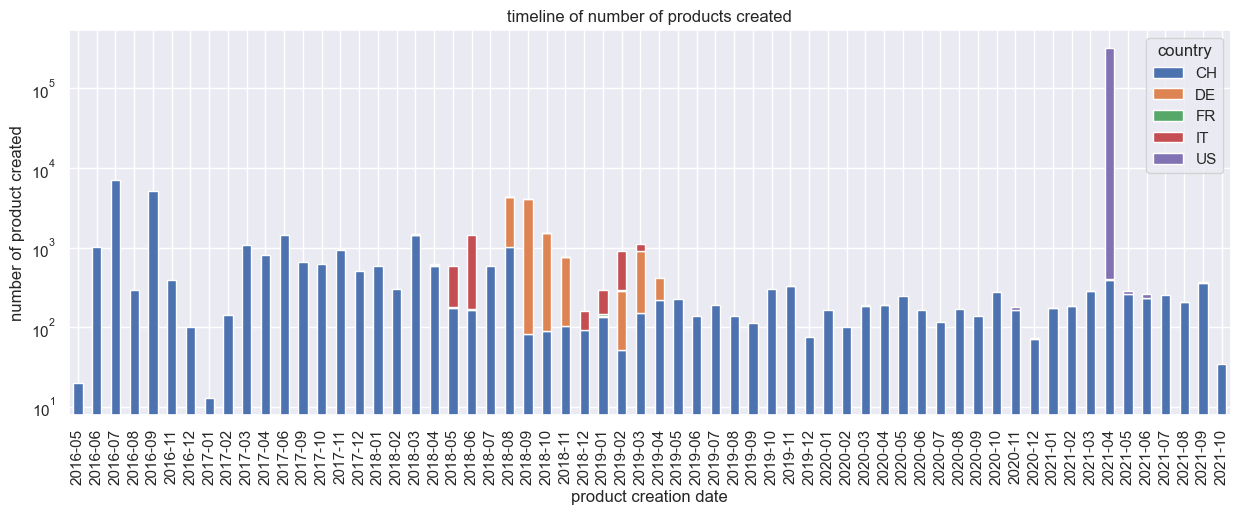

In [100]:
# create stacked bar plot with dataframe values
ax = df_e2_pivot.plot.bar(stacked=True, title='timeline of number of products created',
            figsize = (15, 5))

plt.xlabel('product creation date')
plt.xticks(rotation=90)

plt.ylabel('number of product created')
plt.yscale('log')

# show plot
plt.show(ax)

The number of items produced per month is mostly between hundred and thousand, except in April 2021 when the number exceeded 100'000. Many of these items were produced in the US (marked violet on the plot). Otherwise, items were produced every month in Switzerland with some contribution from Germany and Italy from time to time.

## F. Correlation analysis

**1. Your task is to quantify the linear relationships between the energy_per_hundred and the per_hundred columns by analysing their correlation with each other.**

In [101]:
# list with correlation coefficients between energy_per_hundred and per_hundred columns
corr = []
for i in range(len(_per_hundred_new)):
   corr.append(df['energy_per_hundred'].corr(df[_per_hundred_new[i]]))

# create dataframe with column name and correlation coeficient with energy_per_hundred
df_f1 = pd.DataFrame(
    {'_per_hundred_column': _per_hundred_new,
     'correlation_with_energy_per_hundred': corr,
    })

# show dataframe
df_f1

_per_hundred_column  \
0                               calcium_per_hundred   
1                         carbohydrates_per_hundred   
2                           cholesterol_per_hundred   
3                           energy_kcal_per_hundred   
4                                energy_per_hundred   
5                                   fat_per_hundred   
6           fatty_acids_total_saturated_per_hundred   
7               fatty_acids_total_trans_per_hundred   
8                                 fiber_per_hundred   
9                                  iron_per_hundred   
10          monounsaturated_fatty_acids_per_hundred   
11          polyunsaturated_fatty_acids_per_hundred   
12                          potassium_k_per_hundred   
13                              protein_per_hundred   
14                                 salt_per_hundred   
15                        saturated_fat_per_hundred   
16                               sodium_per_hundred   
17                         sugars_added_per_hundred   
18                               sugars_per_hundred   
19                         vitamin_a_iu_per_hundred   
20                   vitamin_b1_thiamin_per_hundred   
21                vitamin_b2_riboflavin_per_hundred   
22                    vitamin_b3_niacin_per_hundred   
23              vitamin_c_ascorbic_acid_per_hundred   
24  vitamin_d_d2_d3_international_units_per_hundred   

    correlation_with_energy_per_hundred  
0                              0.050891  
1                              0.524098  
2                              0.005892  
3                              0.999993  
4                              1.000000  
5                              0.778666  
6                              0.562515  
7                              0.046733  
8                              0.292986  
9                              0.006625  
10                             0.718109  
11                             0.609028  
12                             0.057487  
13                             0.317397  
14                            -0.048439  
15                             0.637550  
16                            -0.094713  
17                             0.417747  
18                             0.343567  
19                            -0.046480  
20                            -0.001299  
21                             0.026098  
22                            -0.059080  
23                            -0.022409  
24                             0.004249

**2. Your task is to reveal the true nature of the relationship using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated nutrients (in absolute terms) with the energy_per_hundred column.**

In [102]:
# sort by absolute value of correlation coefficient
df_f1.sort_values(by='correlation_with_energy_per_hundred', key=abs)

_per_hundred_column  \
20                   vitamin_b1_thiamin_per_hundred   
24  vitamin_d_d2_d3_international_units_per_hundred   
2                           cholesterol_per_hundred   
9                                  iron_per_hundred   
23              vitamin_c_ascorbic_acid_per_hundred   
21                vitamin_b2_riboflavin_per_hundred   
19                         vitamin_a_iu_per_hundred   
7               fatty_acids_total_trans_per_hundred   
14                                 salt_per_hundred   
0                               calcium_per_hundred   
12                          potassium_k_per_hundred   
22                    vitamin_b3_niacin_per_hundred   
16                               sodium_per_hundred   
8                                 fiber_per_hundred   
13                              protein_per_hundred   
18                               sugars_per_hundred   
17                         sugars_added_per_hundred   
1                         carbohydrates_per_hundred   
6           fatty_acids_total_saturated_per_hundred   
11          polyunsaturated_fatty_acids_per_hundred   
15                        saturated_fat_per_hundred   
10          monounsaturated_fatty_acids_per_hundred   
5                                   fat_per_hundred   
3                           energy_kcal_per_hundred   
4                                energy_per_hundred   

    correlation_with_energy_per_hundred  
20                            -0.001299  
24                             0.004249  
2                              0.005892  
9                              0.006625  
23                            -0.022409  
21                             0.026098  
19                            -0.046480  
7                              0.046733  
14                            -0.048439  
0                              0.050891  
12                             0.057487  
22                            -0.059080  
16                            -0.094713  
8                              0.292986  
13                             0.317397  
18                             0.343567  
17                             0.417747  
1                              0.524098  
6                              0.562515  
11                             0.609028  
15                             0.637550  
10                             0.718109  
5                              0.778666  
3                              0.999993  
4                              1.000000

3 least correlated per_hundred nutrients are: vitamin_b1_thiamin_per_hundred, vitamin_d_d2_d3_international_units_per_hundred and cholesterol_per_hundred.

3 most correlated per_hundred nutrients are: fat_per_hundred, monounsaturated_fatty_acids_per_hundred and saturated_fat_per_hundred.

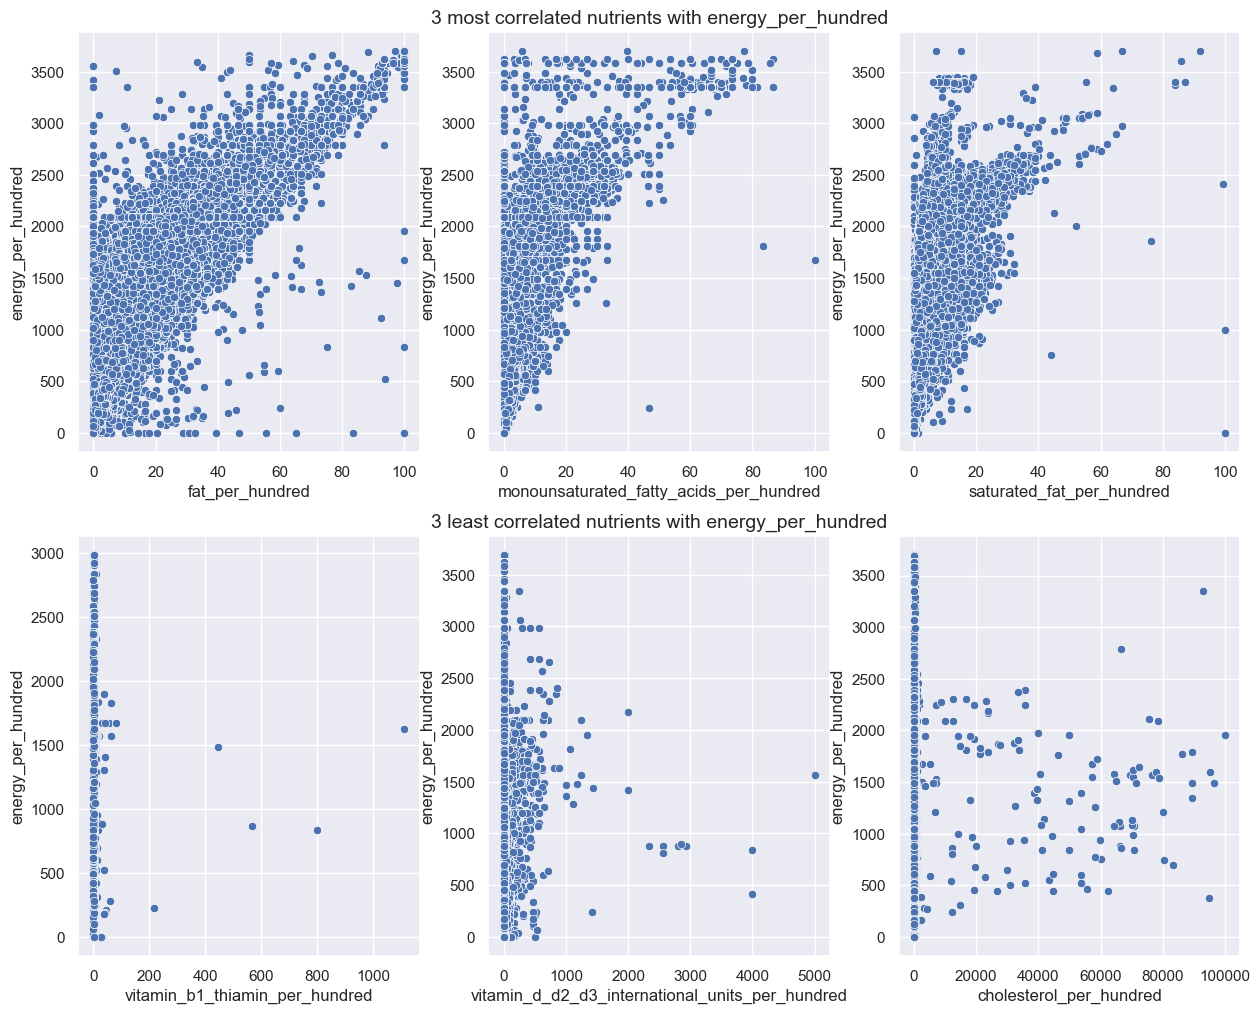

In [103]:
# figure with 6 scatterplots in 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# 3 subplots
sns.scatterplot(ax=axes[0][0], x=df['fat_per_hundred'], y=df['energy_per_hundred'])
sns.scatterplot(ax=axes[0][1], x=df['monounsaturated_fatty_acids_per_hundred'], y=df['energy_per_hundred'])
sns.scatterplot(ax=axes[0][2], x=df['saturated_fat_per_hundred'], y=df['energy_per_hundred'])
axes[0][1].set_title('3 most correlated nutrients with energy_per_hundred', fontsize=14)

# 3 subplots
sns.scatterplot(ax=axes[1][0], x=df['vitamin_b1_thiamin_per_hundred'], y=df['energy_per_hundred'])
sns.scatterplot(ax=axes[1][1], x=df['vitamin_d_d2_d3_international_units_per_hundred'], y=df['energy_per_hundred'])
sns.scatterplot(ax=axes[1][2], x=df['cholesterol_per_hundred'], y=df['energy_per_hundred'])
axes[1][1].set_title('3 least correlated nutrients with energy_per_hundred', fontsize=14)

# show plot
plt.show()

**3. Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable that holds equal proportion of values in three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced.**

In [104]:
# dataframe with energy_per_hundred and country columns
df_f3 = df[['energy_per_hundred', 'country']]

# show first 5 entries
df_f3.head()

energy_per_hundred country
0              1500.0      CH
1              1010.0      CH
2              1358.3      CH
3              1679.0      CH
4              2470.0      CH

In [105]:
# add new column that holds equal proportion of energy_per_hundred values (low, medium and high energy) 

# new empty column energy_per_hundred_category
df_f3=df_f3.assign(energy_per_hundred_category = '')

# list of values (low, medium and high energy) 
category = pd.qcut(df_f3['energy_per_hundred'], 3, 
                   labels=['low energy', 'medium energy', 'high energy']).to_list()

# add list of values to energy_per_hundred_category column
df_f3['energy_per_hundred_category'] = category

# show first 5 entries
df_f3.head()

energy_per_hundred country energy_per_hundred_category
0              1500.0      CH               medium energy
1              1010.0      CH               medium energy
2              1358.3      CH               medium energy
3              1679.0      CH                 high energy
4              2470.0      CH                 high energy

Null hypothesis is that energy_per_hundred_category and country varibles are independent.

In [106]:
# data summarized in a contingency table
pd.crosstab(df_f3.energy_per_hundred_category, df_f3.country, margins=True)

country                      AT     CH   DE  FR   IT  UK      US     All
energy_per_hundred_category                                             
high energy                   0   7548  369  12  113   0  102658  110700
low energy                    1   6261  249  15   66   1  105324  111917
medium energy                 0   7536  327  22   88   0  104779  112752
All                           1  21345  945  49  267   1  312761  335369

In [107]:
# chi-square test of independence
from scipy import stats
chi_square, p_value, dof, matrix = stats.chi2_contingency(pd.crosstab(df_f3.energy_per_hundred_category, 
                                                                      df_f3.country))
print(chi_square, p_value)

216.1906135572625 1.4622627204827325e-39


The p-value is lower than the significance level of 0.05. Therefore null hypothesis can be rejected. This means that the level of energy in the product is associated with the country where the product is produced.

## G. Advanced EDA

**1. What is the total number of samples by country? Countries with very small sample size should be dropped from this analysis as their results may not be statistically significant.**

In [108]:
# total number of samples by country
df['country'].value_counts()

US    326317
CH     31912
DE     10595
IT      2709
FR       113
AT         1
UK         1
Name: country, dtype: int64

Austria (AT) and United Kingdom (UK) have only 1 sample and will be dropped from the analysis.

In [109]:
# drop rows with austria (AT) and united kingdom (UK)
df = df.drop(df[df['country']=='AT'].index)
df = df.drop(df[df['country']=='UK'].index)

In [110]:
# dataframe shape
df.shape

(371646, 77)

Dataframe has 371'646 rows and 77 columns.

**2. Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?**

In [111]:
# dataframe with organic products (containing bio or organic in their product name)
df_organic = df[(df['product_name_en'].str.contains('bio|organic', na=False, flags=re.IGNORECASE, regex=True))]

# number of organic products in each country
df_organic['country'].value_counts()

US    17076
CH     1586
DE      119
IT        6
FR        3
Name: country, dtype: int64

In [112]:
# dataframe with non-organic products
df_non_organic=df[(~df['product_name_en'].str.contains('bio|organic', na=False, flags=re.IGNORECASE, regex=True))]

# number of non-organic products in each country
df_non_organic['country'].value_counts()

US    309241
CH     30326
DE     10476
IT      2703
FR       110
Name: country, dtype: int64

In [113]:
# percentage of organic products per country
(df_organic['country'].value_counts() / df_non_organic['country'].value_counts()) * 100

US    5.521907
CH    5.229836
DE    1.135930
IT    0.221976
FR    2.727273
Name: country, dtype: float64

United States and Switzerland have the highest percentage of organic products, above 5%. France has 2.7%, Germany 1%, and Italy 0.2%.

**3. Compare the distributions of the macronutrients between organic and non-organic products in each country with appropriate visualisations in the subplots format.**

In [114]:
# dataframe with country and macronutrients of organic products
df_organic_macronutrients = df_organic[['country',
                                       'carbohydrates_per_hundred',
                                       'fat_per_hundred',
                                       'fiber_per_hundred',
                                       'protein_per_hundred']]

In [115]:
# dataframe with country and macronutrients of non-organic products
df_non_organic_macronutrients = df_non_organic[['country',
                                                'carbohydrates_per_hundred',
                                                'fat_per_hundred',
                                                'fiber_per_hundred',
                                                'protein_per_hundred']]

**United States**

array([[<AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>,
        <AxesSubplot:title={'center':'protein_per_hundred'}>]],
      dtype=object)

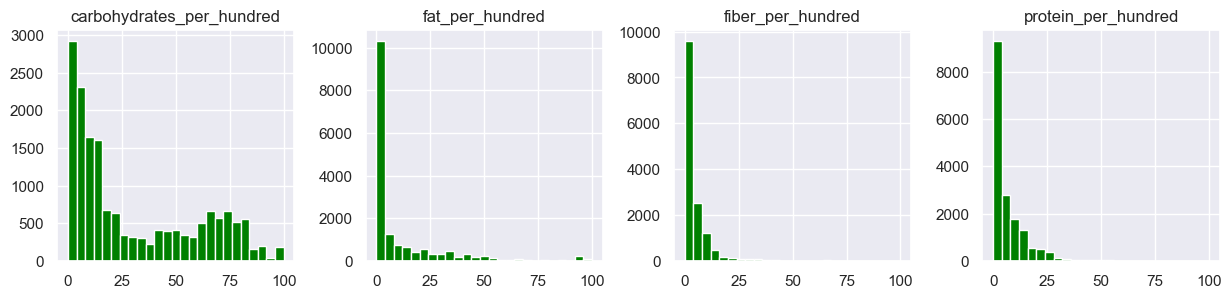

In [116]:
# US organic products macronutrients distrubution
df_organic_macronutrients[df_organic_macronutrients['country']=='US'].hist(bins=25, figsize=(15, 3),
                                                                           layout=(-1,4), color='green')

array([[<AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>,
        <AxesSubplot:title={'center':'protein_per_hundred'}>]],
      dtype=object)

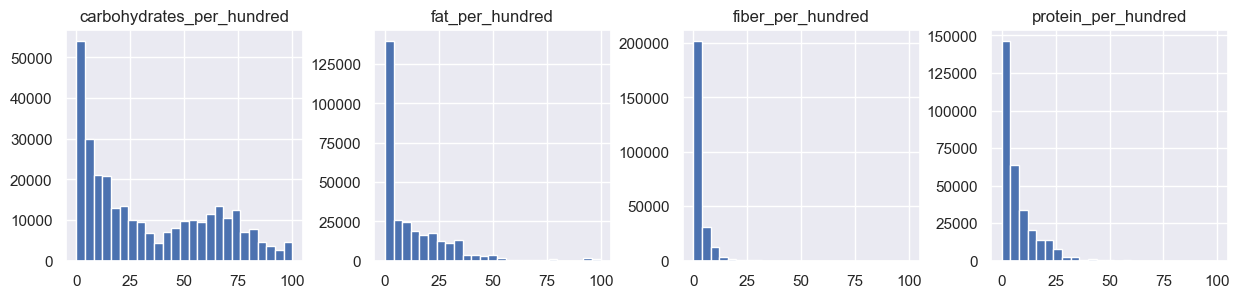

In [117]:
# US non-organic products macronutrients distribution
df_non_organic_macronutrients[df_non_organic_macronutrients['country']=='US'].hist(bins=25, figsize=(15, 3),
                                                                                   layout=(-1,4))

**Switzerland**

array([[<AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>,
        <AxesSubplot:title={'center':'protein_per_hundred'}>]],
      dtype=object)

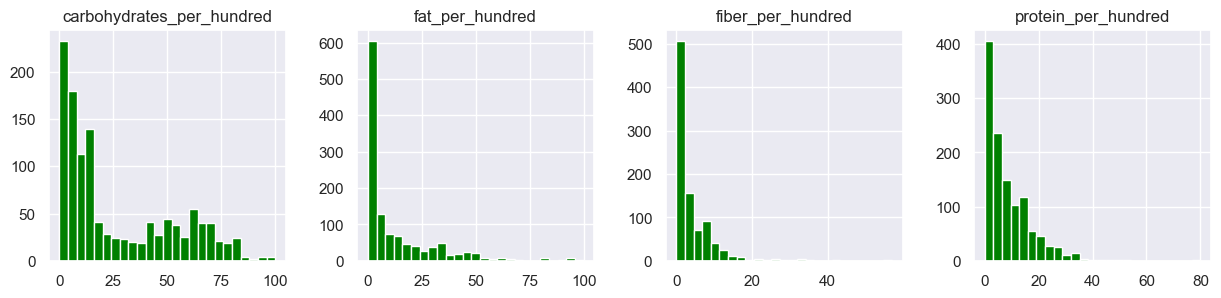

In [118]:
# CH organic products macronutrients distrubution
df_organic_macronutrients[df_organic_macronutrients['country']=='CH'].hist(bins=25, figsize=(15, 3),
                                                                           layout=(-1,4), color='green')

array([[<AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>,
        <AxesSubplot:title={'center':'protein_per_hundred'}>]],
      dtype=object)

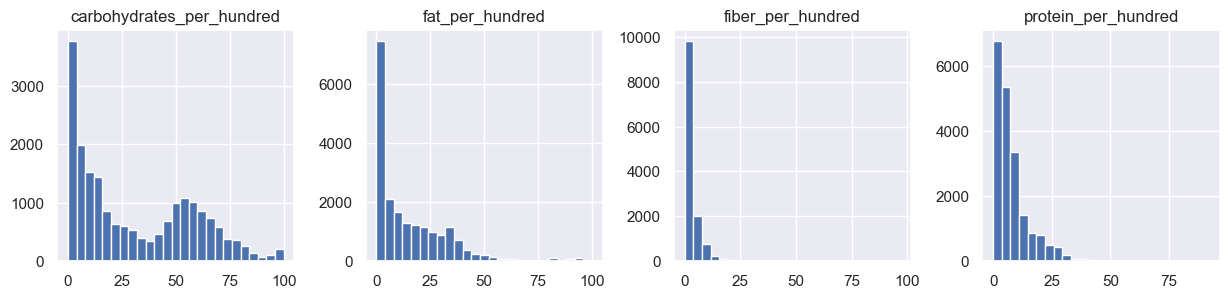

In [119]:
# CH non-organic products macronutrients distribution
df_non_organic_macronutrients[df_non_organic_macronutrients['country']=='CH'].hist(bins=25, figsize=(15, 3),
                                                                                   layout=(-1,4))

**Germany**

array([[<AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>,
        <AxesSubplot:title={'center':'protein_per_hundred'}>]],
      dtype=object)

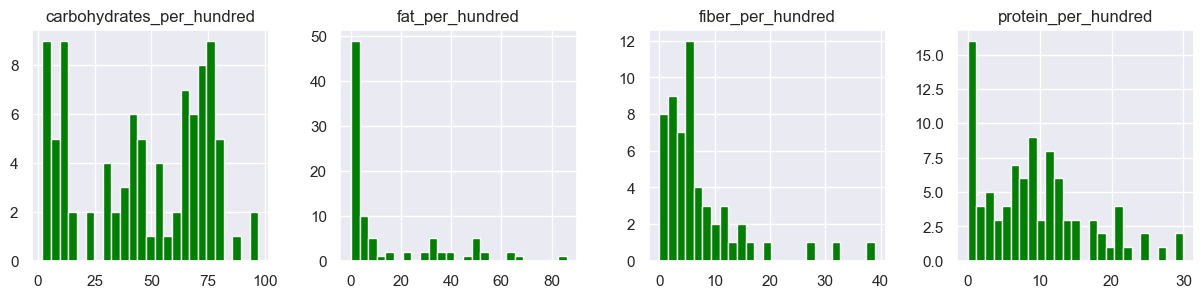

In [120]:
# DE organic products macronutrients distrubution
df_organic_macronutrients[df_organic_macronutrients['country']=='DE'].hist(bins=25, figsize=(15, 3),
                                                                           layout=(-1,4), color='green')

array([[<AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>,
        <AxesSubplot:title={'center':'protein_per_hundred'}>]],
      dtype=object)

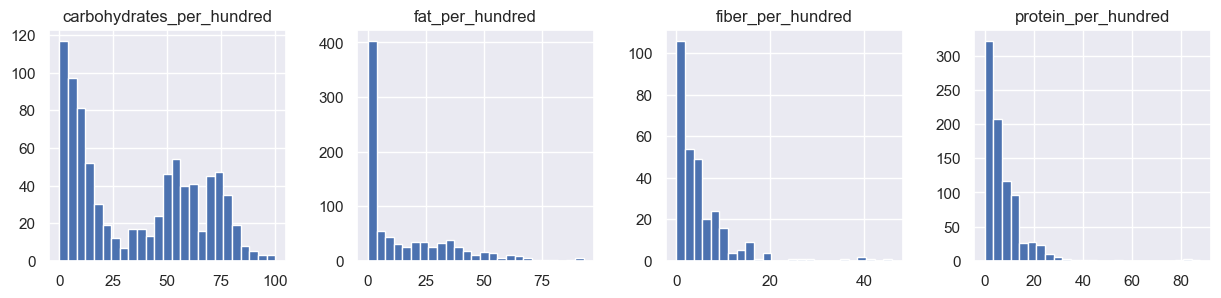

In [121]:
# DE non-organic products macronutrients distribution
df_non_organic_macronutrients[df_non_organic_macronutrients['country']=='DE'].hist(bins=25, figsize=(15, 3),
                                                                                   layout=(-1,4))

Distribution of carbohydrates_per_hundred shows that organic products have lower values in carbohydrates, when compared to non-organic products for all 3 countries (US, CH, DE).

Distribution of macronutrients was not considered for Italy and France, because they have less than 10 organic products.